In [1]:
import os 
import sys
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
models1Dnames=['ARIMA', 'Exponential', 'Moving Average', 'SIRH1', 'SIRH2', 'SIRH3', 'SIRH4', 'Linear Regression', 'Bayesian Regression']
models3Dnames=[ 'VAR', 'Exponential Multi', 'Moving Average Multi', 'SIRH Multi1', 'SIRH Multi2']


In [2]:
def df_to_dict(df): 
    df.drop(['Unnamed: 0'], axis=1, inplace=True)
    dict={}
    for column in df.columns : 
        dict[column]=list(df[column])
    return dict

In [3]:


def plot_pandemic(reach = 7 , mob = 0 , pand = 0 , type_of_model= '1D', loss='RMSE') : 

    df=pd.read_csv('./all_pandemics/pandemic_'+str(mob)+str('_')+str(pand)+'.csv')
    df.drop(['Unnamed: 0'], axis=1, inplace=True)
    n_hospitalized= np.array(df.loc[0])
    plt.plot(n_hospitalized)


    results=pd.read_csv('./results/global_evaluation_from_zero_corrected/evaluation_with_'+loss+'_of_'+type_of_model+'_models_on_pandemic_'+str(mob)+str('_')+str(pand)+'_and_reach_='+str(reach)+'.csv')
    results.drop(['Unnamed: 0'], axis=1, inplace=True)
    if type_of_model == '3D':
        models_names=models3Dnames
    elif type_of_model == '1D':
        models_names=models1Dnames
    results.index=models_names
    predictions=pd.read_csv('./results/predictions_of_the_models_corrected/predictions_'+str(reach)+'_days_on_pandemic_'+str(mob)+str('_')+str(pand)+'.csv')
    predictions.drop(['Unnamed: 0'], axis=1, inplace=True)
    predictions.index=[20 * i for i in range(1, 15)]
    label_dones=[]
    for point in results.columns :
        best_model=models_names[np.argmin(results[point])]
        id=int(point.split('[')[1].split(']')[0])
        if best_model not in label_dones : 
            plt.plot(id + reach, predictions[best_model].loc[id], 'o',color=colors_models[best_model],  label=best_model)
            label_dones.append(best_model)
        else : 
            plt.plot(id + reach, predictions[best_model].loc[id], 'o',color=colors_models[best_model])

    plt.title('Best '+type_of_model+' models according to '+loss+' and their predictions on pandemic ' + str(mob) + ' ' + str(pand))  
    plt.xlabel('Days')
    plt.ylabel('Number of hospitalized')
    plt.legend()
    plt.show()



In [4]:

def concat_dico(dico1, dico2): 
    dico={}
    for key in dico1.keys(): 
        dico[key]=dico1[key]+dico2[key]
    return dico


In [5]:
# concatenate two df who have the same columns : 
def concat_df(df1, df2):
    if not df1.columns.equals(df2.columns):
        raise ValueError("Les deux DataFrames doivent avoir les mêmes colonnes."+str(df1.columns)+str(df2.columns))
    
    return pd.concat([df1, df2], axis=0)

In [6]:


def classify(point, pandemic) : 
    if pandemic[point] < 100 : 
        return ('stable')
    der = (1/7)*(pandemic[point+7] - pandemic[point]) / pandemic[point]
    derder=(1/49) * (pandemic[point + 7] + pandemic[point-7] - 2*pandemic[point] ) / pandemic[point]
    if  der < -0.05: 
        return  'big decrease'
    elif der <-0.03:
        return 'decrease'
    elif der < 0.03 :
        if abs(derder) > 0.003 : 
            return 'inflexion'
        else :
            return 'stable'
    elif der < 0.2 :
        return 'increase'
    else : 
        return 'big increase'
    

In [7]:
dicocolor={'big decrease':'green', 'decrease':'lightgreen', 'stable':'yellow', 'increase':'orange', 'big increase':'red', 'inflexion':'blue'}
colors_models={'ARIMA':'blue', 'Exponential':'red', 'Moving Average':'green', 'SIRH1':'yellow', 'SIRH2':'orange', 'SIRH3':'purple', 'SIRH4':'pink', 'Linear Regression':'brown', 'Bayesian Regression':'black', 'VAR':'blue', 'Exponential Multi':'red', 'Moving Average Multi':'green', 'SIRH Multi1':'yellow', 'SIRH Multi2':'orange'}

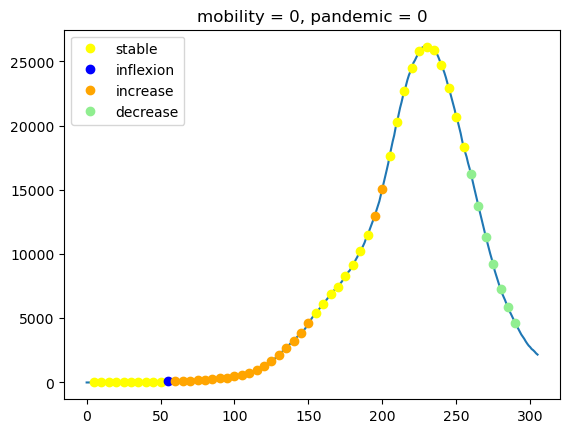

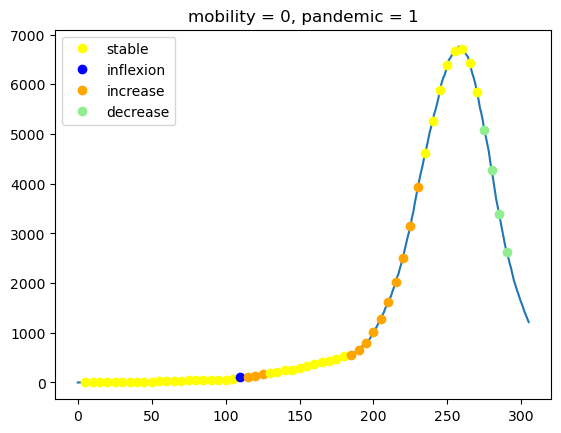

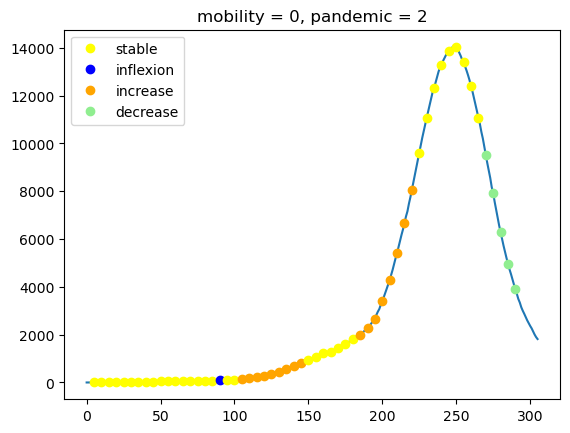

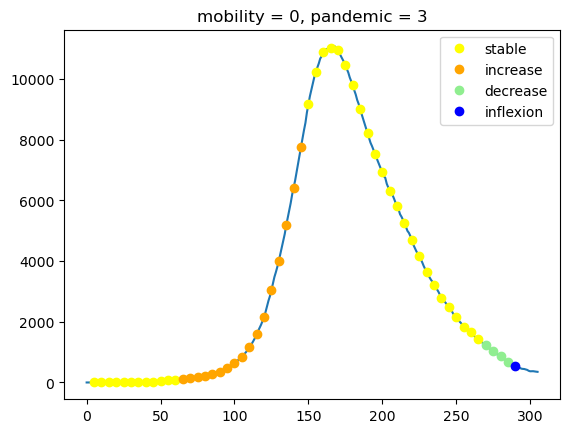

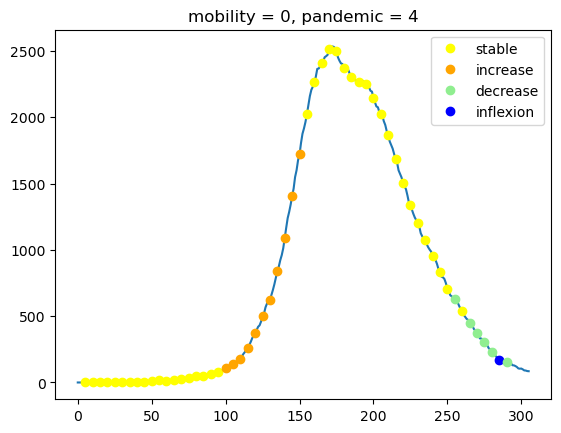

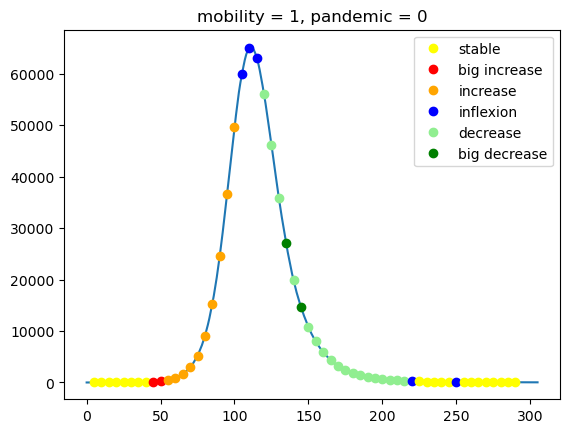

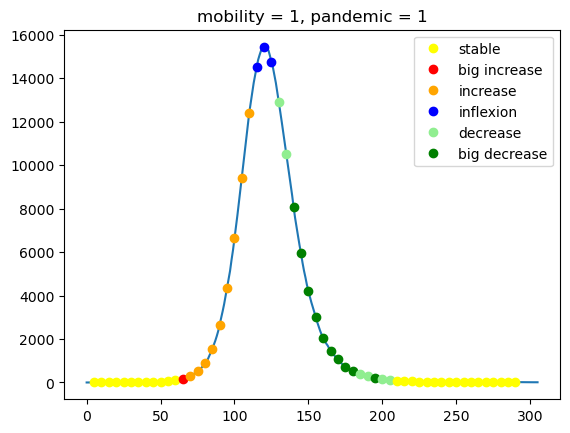

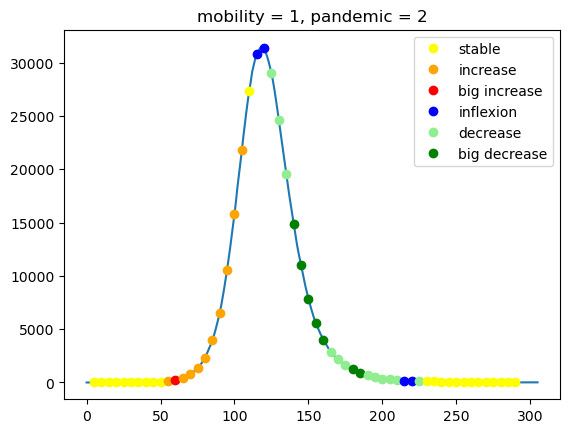

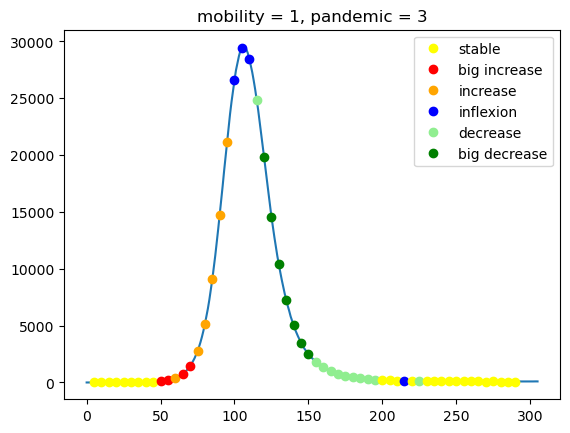

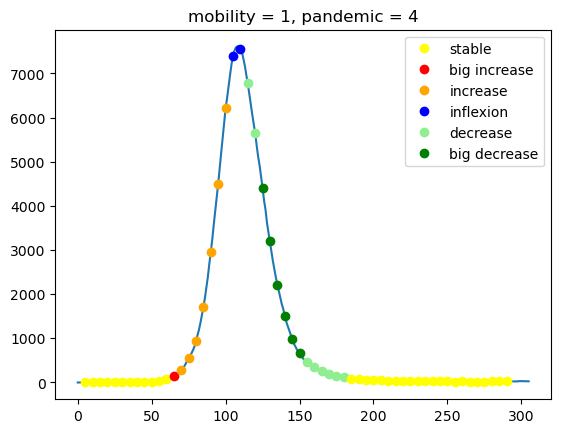

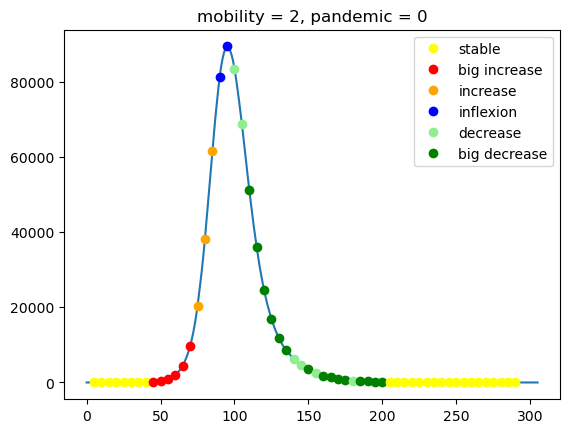

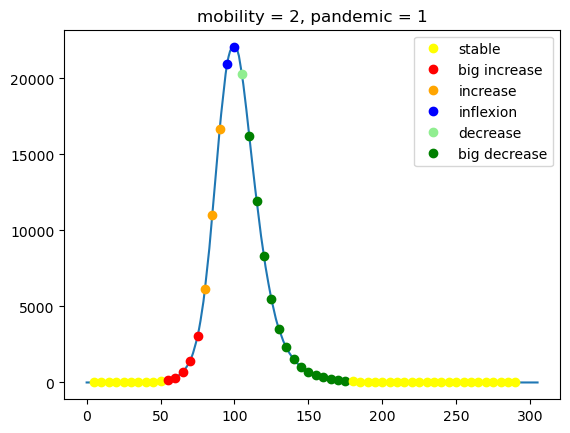

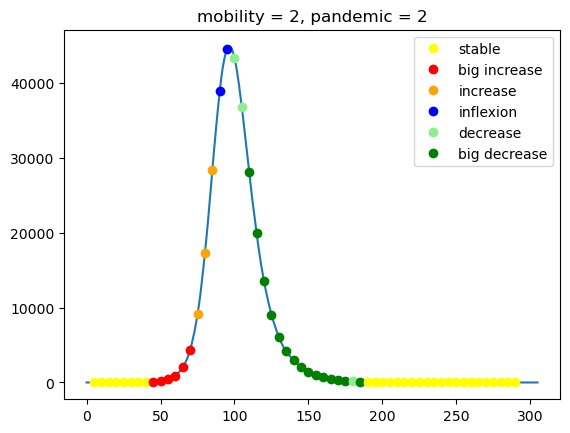

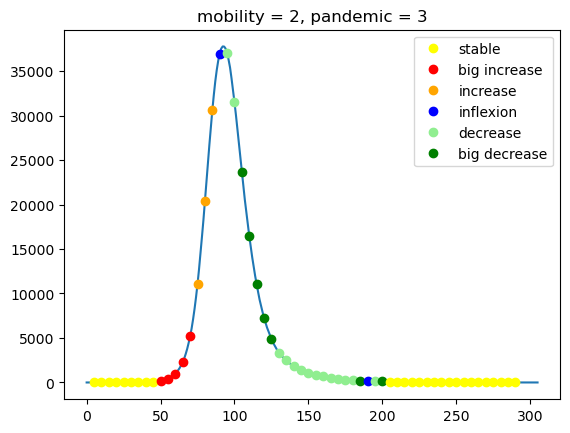

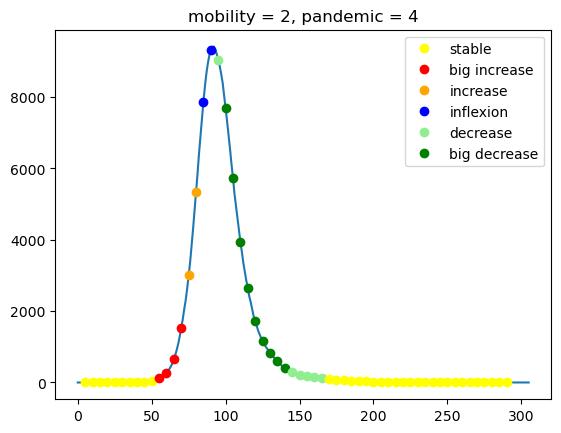

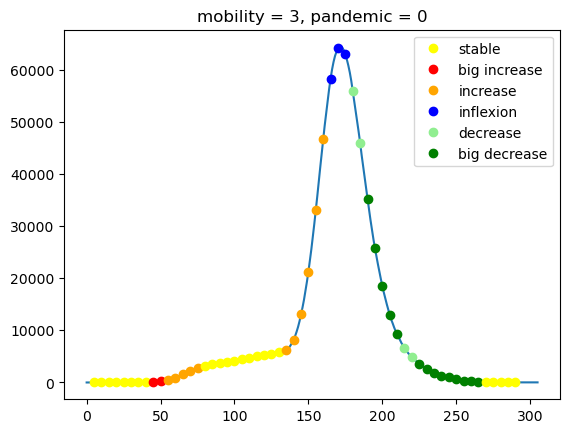

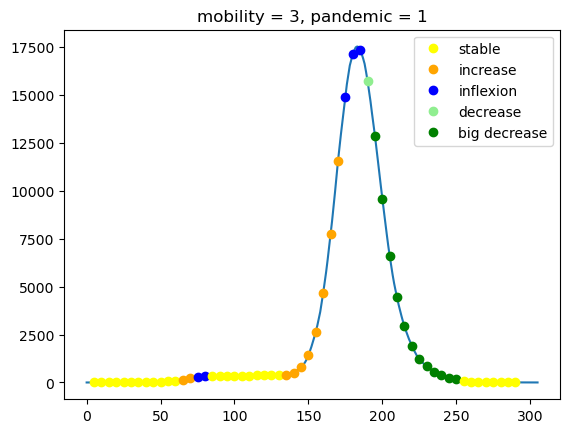

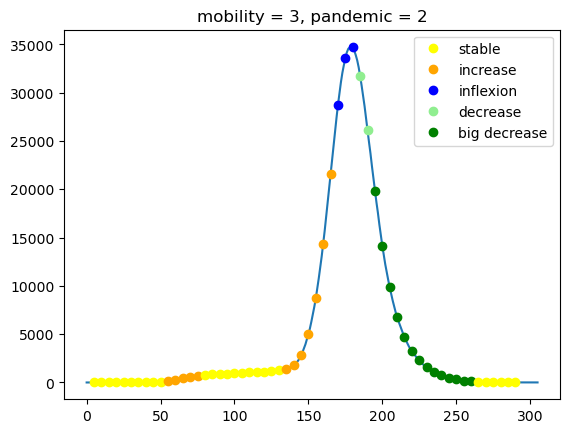

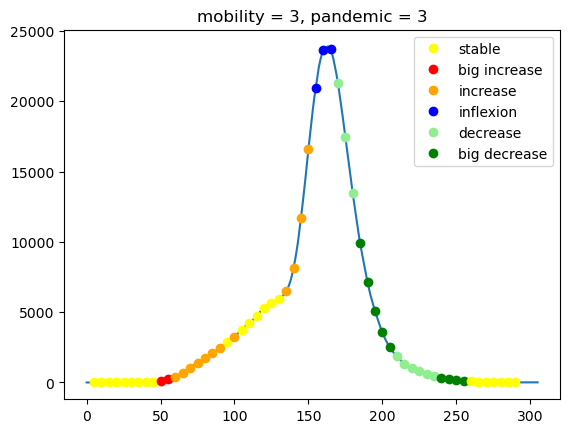

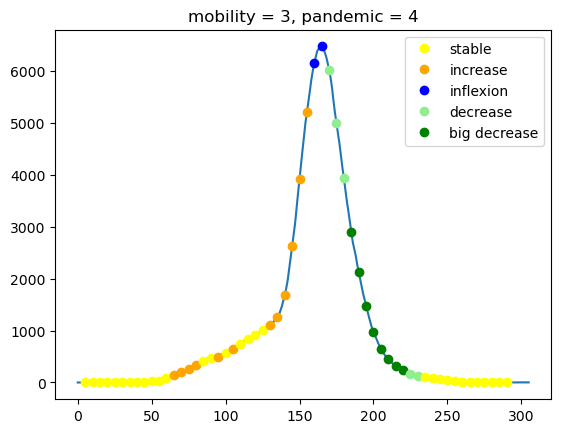

stable = 599
decrease = 132
increase = 192
big decrease = 149
big increase = 39
inflexion = 49


In [8]:
xs=[5*i for i in range(1, 59)]

countstable=0
countdecrease=0
countincrease=0
countbigdecrease=0
countbigincrease=0
countinflexion=0

for mob in range(4): 
    for pand in range(5): 
        label_seen = {}

        df= pd.read_csv('./all_pandemics/pandemic_'+str(mob)+'_'+str(pand)+'.csv')
        df.index=['n_hospitalized', 'n_infectious', 'mobility', 'r_eff']
        df.drop(['Unnamed: 0'], axis=1, inplace=True)
        n_hospitalized = np.array(df.loc['n_hospitalized'])
        plt.plot(n_hospitalized)
        for x in xs : 
            if classify(x, n_hospitalized) == 'stable' : 
                countstable+=1
            if classify(x, n_hospitalized) == 'decrease' : 
                countdecrease+=1
            if classify(x, n_hospitalized) == 'increase' : 
                countincrease+=1
            if classify(x, n_hospitalized) == 'big decrease' : 
                countbigdecrease+=1
            if classify(x, n_hospitalized) == 'big increase' : 
                countbigincrease+=1
            if classify(x, n_hospitalized) == 'inflexion' : 
                countinflexion+=1
            label = classify(x, n_hospitalized)
            if label not in label_seen:
                plt.plot(x, n_hospitalized[x], 'o', color=dicocolor[label], label=label)
                label_seen[label] = True
            else:
                plt.plot(x, n_hospitalized[x], 'o', color=dicocolor[label])
        plt.title('mobility = '+str(mob)+', pandemic = '+str(pand))
        plt.legend()
        plt.show()

    
print('stable = ' +str(countstable))
print('decrease = ' +str(countdecrease))
print('increase = ' +str(countincrease))
print('big decrease = ' +str(countbigdecrease))
print('big increase = ' +str(countbigincrease))
print('inflexion = ' +str(countinflexion))


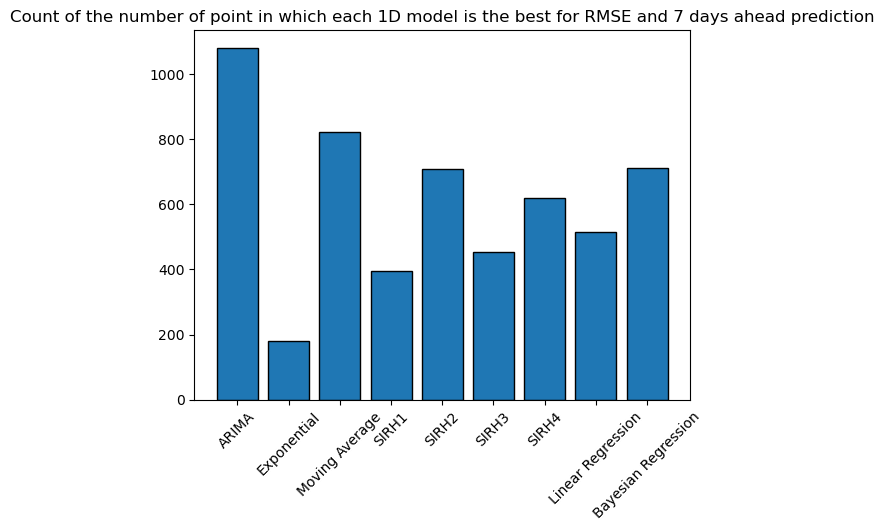

In [10]:

rmse_7_1D=[ name for name in os.listdir('./results/global_evaluation_from_zero_corrected/') if 'RMSE' in name and '7' in name and '1D' in name]

counts=[0 for i in range(len(models1Dnames))]


for name in rmse_7_1D: 
    dicoresults=df_to_dict(pd.read_csv('./results/global_evaluation_from_zero_corrected/'+name))
    for point in dicoresults.keys(): 
        counts[np.argmin(dicoresults[point])]+=1

# histogramme des résultats 
plt.bar(models1Dnames, counts, edgecolor='black')
plt.xticks(rotation=45)
plt.title('Count of the number of point in which each 1D model is the best for RMSE and 7 days ahead prediction')
plt.show()


# rmse_14_1D=[ name for name in os.listdir('./results/global_evaluation_from_zero/') if 'RMSE' in name and '14' in name and '1D' in name]

# counts=[0 for i in range(len(models1Dnames))]


# for name in rmse_14_1D: 
#     dicoresults=json.load(open('./results/global_evaluation_from_zero/'+name))
#     for point in dicoresults.keys(): 
#         counts[np.argmin(dicoresults[point])]+=1

# # histogramme des résultats 
# plt.bar(models1Dnames, counts, edgecolor='black')
# plt.xticks(rotation=45)
# plt.title('Count of the number of point in which each 1D model is the best for RMSE and 14 days ahead prediction')
# plt.show()


# wis_7_1D=[ name for name in os.listdir('./results/global_evaluation_from_zero/') if 'WIS' in name and '7' in name and '1D' in name]
# counts=[0 for i in range(len(models1Dnames))]
# for name in wis_7_1D: 
#     dicoresults=json.load(open('./results/global_evaluation_from_zero/'+name))
#     for point in dicoresults.keys(): 
#         counts[np.argmin(dicoresults[point])]+=1


# plt.bar(models1Dnames, counts, edgecolor='black')
# plt.xticks(rotation=45)
# plt.title('Count of the number of point in which each 1D model is the best for WIS and 7 days ahead prediction')
# plt.show()

# wis_14_1D=[ name for name in os.listdir('./results/global_evaluation_from_zero/') if 'WIS' in name and '14' in name and '1D' in name]
# counts=[0 for i in range(len(models1Dnames))]
# for name in wis_14_1D: 
#     dicoresults=json.load(open('./results/global_evaluation_from_zero/'+name))
#     for point in dicoresults.keys(): 
#         counts[np.argmin(dicoresults[point])]+=1


# plt.bar(models1Dnames, counts, edgecolor='black')
# plt.xticks(rotation=45)
# plt.title('Count of the number of point in which each 1D model is the best for WIS and 14 days ahead prediction')
# plt.show()



# rmse_7_3D=[ name for name in os.listdir('./results/global_evaluation_from_zero/') if 'RMSE' in name and '7' in name and '3D' in name]
# counts=[0 for i in range(len(models3Dnames))]
# for name in rmse_7_3D: 
#     dicoresults=json.load(open('./results/global_evaluation_from_zero/'+name))
#     for point in dicoresults.keys(): 
#         counts[np.argmin(dicoresults[point])]+=1

# plt.bar(models3Dnames, counts, edgecolor='black')
# plt.xticks(rotation=45)
# plt.title('Count of the number of point in which each 3D model is the best for RMSE and 7 days ahead prediction')
# plt.show()


# rmse_14_3D=[ name for name in os.listdir('./results/global_evaluation_from_zero/') if 'RMSE' in name and '14' in name and '3D' in name]
# counts=[0 for i in range(len(models3Dnames))]
# for name in rmse_14_3D: 
#     dicoresults=json.load(open('./results/global_evaluation_from_zero/'+name))
#     for point in dicoresults.keys(): 
#         counts[np.argmin(dicoresults[point])]+=1

# plt.bar(models3Dnames, counts, edgecolor='black')
# plt.xticks(rotation=45)
# plt.title('Count of the number of point in which each 3D model is the best for RMSE and 14 days ahead prediction')
# plt.show()


# wis_7_3D=[ name for name in os.listdir('./results/global_evaluation_from_zero/') if 'WIS' in name and '7' in name and '3D' in name]
# counts=[0 for i in range(len(models3Dnames))]
# for name in wis_7_3D: 
#     dicoresults=json.load(open('./results/global_evaluation_from_zero/'+name))
#     for point in dicoresults.keys(): 
#         counts[np.argmin(dicoresults[point])]+=1

# plt.bar(models3Dnames, counts, edgecolor='black')
# plt.xticks(rotation=45)
# plt.title('Count of the number of point in which each 3D model is the best for WIS and 7 days ahead prediction')
# plt.show()


# wis_14_3D=[ name for name in os.listdir('./results/global_evaluation_from_zero/') if 'WIS' in name and '14' in name and '3D' in name]
# counts=[0 for i in range(len(models3Dnames))]
# for name in wis_14_3D: 
#     dicoresults=json.load(open('./results/global_evaluation_from_zero/'+name))
#     for point in dicoresults.keys(): 
#         counts[np.argmin(dicoresults[point])]+=1

# plt.bar(models3Dnames, counts, edgecolor='black')
# plt.xticks(rotation=45)
# plt.title('Count of the number of point in which each 3D model is the best for WIS and 14 days ahead prediction')
# plt.show()


In [11]:
prediction=pd.read_csv('./results/predictions_of_the_models_corrected/predictions_7_days_on_pandemic_0_0.csv')
prediction.drop(['Unnamed: 0'], axis=1, inplace=True)
prediction.index=[20*i for i in range(1, 15)]
prediction.drop('Exponential', axis=1, inplace=True)
prediction.drop('Exponential Multi', axis=1, inplace=True)
prediction.drop('Real values', axis=1, inplace=True)
prediction.loc[20].mean()

4.714170108003656

In [12]:
reach = 7 
mob = 0 
pand = 0 
prediction=pd.read_csv('./results/predictions_of_the_models_corrected/predictions_'+str(reach)+'_days_on_pandemic_'+str(mob)+'_'+str(pand)+'.csv')
prediction.drop(['Unnamed: 0'], axis=1, inplace=True)
prediction.index=[20*i for i in range(1, 15)]
# prediction.drop('Exponential', axis=1, inplace=True)
# prediction.drop('Exponential Multi', axis=1, inplace=True)
prediction_bis=prediction.drop(['Real values', 'Exponential', 'Exponential Multi'], axis=1)

# real_values= prediction['Real values']
prediction_all=prediction
prediction=prediction_bis

prediction_all

,ARIMA,Exponential,Moving Average,SIRH1,SIRH2,SIRH3,SIRH4,Linear Regression,Bayesian Regression,VAR,Exponential Multi,Moving Average Multi,SIRH Multi1,SIRH Multi2,Real values
20,1.333150,1.306084e+01,1.571429,9.827810,8.803629,8.041876,7.892291,1.571429,2.004281,4.668383,1.571429e+00,1.571429,4.432150,4.852185,5.0
40,21.171660,8.910218e+01,33.714286,99.661023,20.798143,31.471588,25.320916,233.950403,-13.670664,54.080831,4.728754e+01,33.714286,51.381132,42.313275,64.0
60,117.895315,-1.538406e+15,100.000000,54.749639,105.679948,94.942743,123.409355,263.986714,122.335549,128.350007,1.098307e+02,100.000000,125.911428,116.701097,138.0
80,243.873279,3.400776e+24,192.857143,113.847490,210.948970,217.282122,236.772141,272.274413,272.441030,264.962311,2.315097e+02,192.857143,279.655080,245.303962,278.0
100,475.096136,2.414255e+32,397.714286,287.538600,461.237094,373.698402,557.602643,561.571618,567.245932,633.674161,5.710016e+02,397.714286,685.673605,397.714286,590.0
120,1622.019546,7.576325e+35,1044.714286,1067.903821,1297.751090,1108.614391,1550.775275,1838.795236,1871.396268,1725.616731,2.048899e+03,1044.714286,1578.907208,1617.986632,1726.0
140,3973.043675,-4.537768e+50,2825.571429,3295.658866,3557.078504,3225.002198,4246.744736,4260.198763,4256.288816,4190.049746,4.329011e+03,2825.571429,3486.457806,4037.393657,3972.0
160,6853.691433,-1.947235e+59,5535.142857,5656.357900,6364.627471,5774.823107,6702.287715,7010.955305,7082.867531,7077.657732,7.559936e+03,5535.142857,5710.766327,6979.057608,6988.0
180,10026.704037,-2.831161e+67,8438.571429,7888.889101,9215.669998,8254.002225,9552.248510,10263.872875,10201.986588,10539.913288,-9.335441e+13,8438.571429,8784.508491,10443.500212,10416.0
200,17592.593012,1.925866e+77,13419.000000,8237.941360,14914.994220,12372.471380,15756.856993,17939.565724,17900.820926,17626.187980,3.297475e+21,13419.000000,13419.000000,16871.445643,18219.0


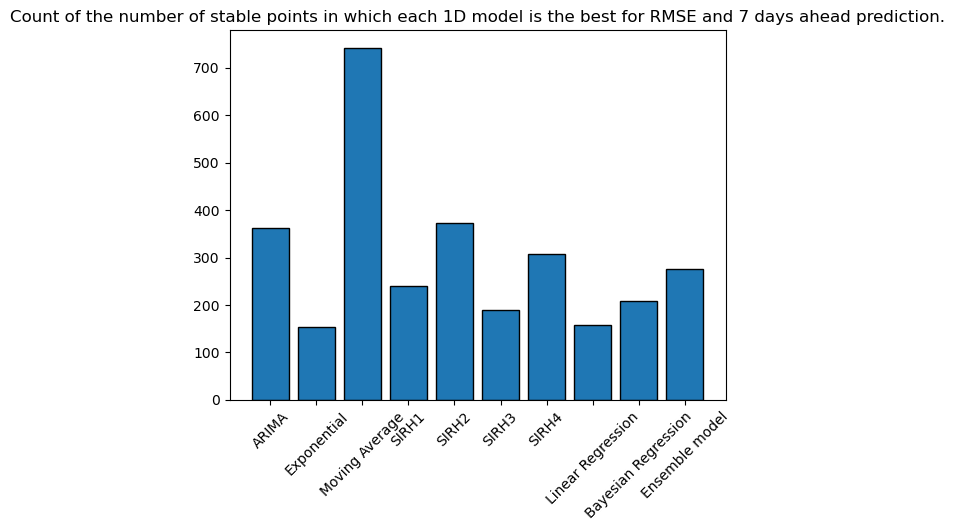

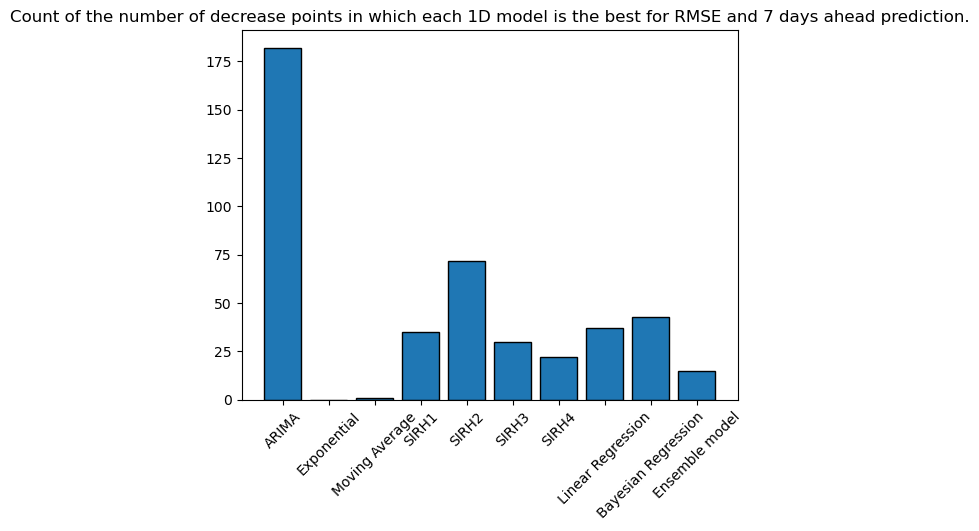

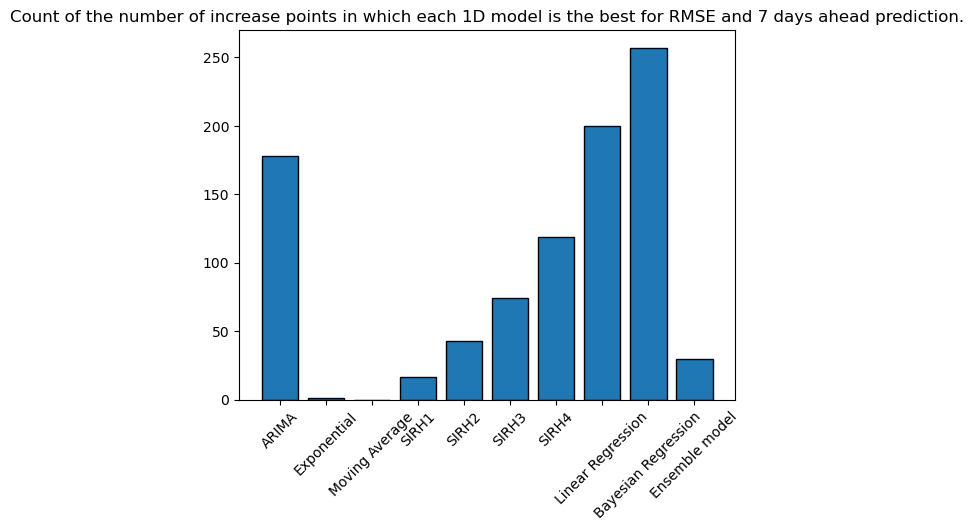

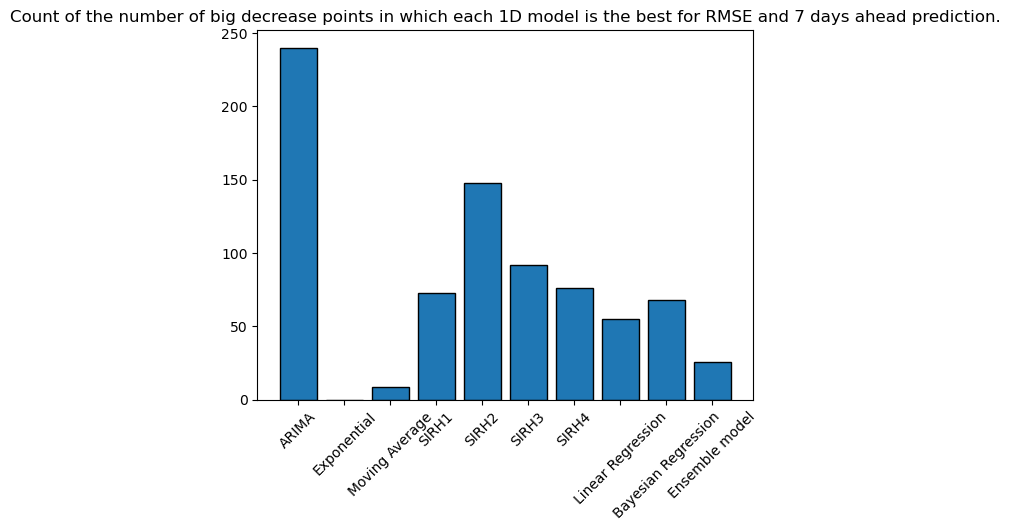

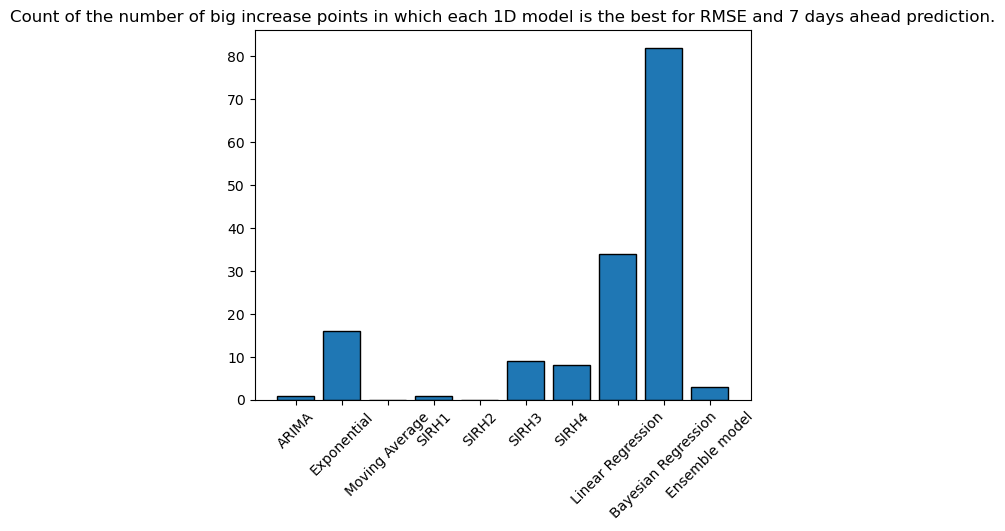

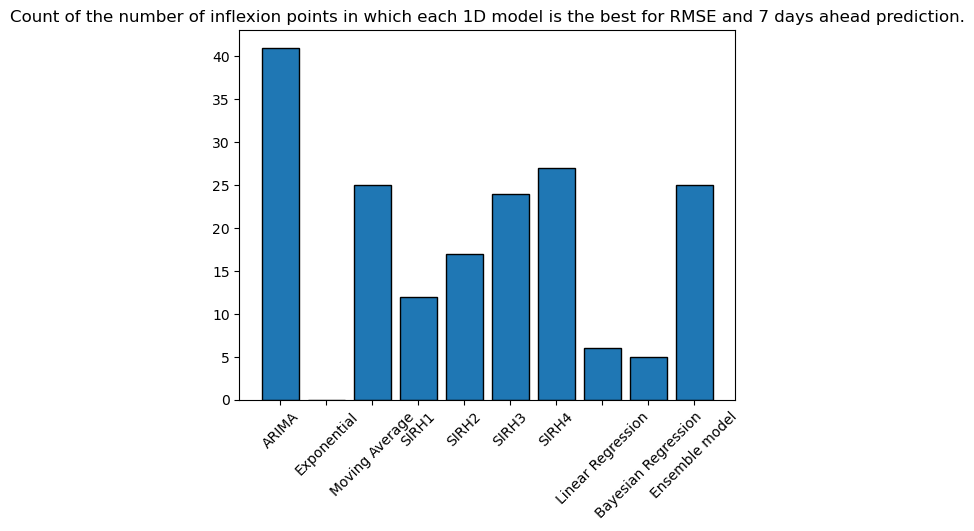

In [13]:
model_type='1D'
loss='RMSE'
reach='7'

for label_point in ['stable', 'decrease', 'increase', 'big decrease', 'big increase', 'inflexion']:
    if model_type == '3D':
        list_of_models=models3Dnames
    else:
        list_of_models=models1Dnames
    counts=[0 for i in range(len(list_of_models) +1)]
    results_list=[ name for name in os.listdir('./results/global_evaluation_from_zero_corrected/') if loss in name and reach in name and model_type in name]
    for name in results_list :
        mob=int(name.split('_')[-5])
        pand=int(name.split('_')[-4])
        prediction=pd.read_csv('./results/predictions_of_the_models_corrected/predictions_'+str(reach)+'_days_on_pandemic_'+str(mob)+'_'+str(pand)+'.csv')
        prediction.drop(['Unnamed: 0'], axis=1, inplace=True)
        prediction.index=[20*i for i in range(1, 15)]
        prediction_bis=prediction.drop(['Real values', 'Exponential', 'Exponential Multi'], axis=1)
        prediction_all=prediction
        prediction=prediction_bis
        dicoresults=df_to_dict(pd.read_csv('./results/global_evaluation_from_zero_corrected/'+name))
        df=pd.read_csv('./all_pandemics/pandemic_'+name.split('_')[-5]+'_'+name.split('_')[-4]+'.csv')
        df.index=['n_hospitalized', 'n_infectious', 'mobility', 'r_eff']
        df.drop(['Unnamed: 0'], axis=1, inplace=True)
        n_hospitalized = np.array(df.loc['n_hospitalized'])
        indexs_points=[[20*i] for i in range(1, 15) ] 
        for point in indexs_points: 
            if classify(point[0], n_hospitalized) == label_point :
                ensemble_value=prediction.loc[point[0]].mean() 
                best_model=(list_of_models[np.argmin(dicoresults[str(point)])])
                pred_best_mod=prediction_all[best_model].loc[point[0]]
                real_value=prediction_all['Real values'].loc[point[0]]
                ensemble_perf=np.abs(ensemble_value-real_value)
                best_mod_perf=np.abs(pred_best_mod-real_value)
                if ensemble_perf < best_mod_perf :
                    counts[-1]+=1
                else :
                    counts[np.argmin(dicoresults[str(point)])]+=1
    
    plt.bar(list_of_models + ['Ensemble model'], counts, edgecolor='black')
    plt.xticks(rotation=45)
    plt.title('Count of the number of '+label_point+' points in which each '+model_type+' model is the best for '+loss+' and '+reach+' days ahead prediction.')
    plt.show()


CLASSEMENTS SSSSSSSSSSSSSSSSSS

In [14]:
def get_classement(maliste): 
    return [sorted(maliste).index(i) for i in (maliste)]
maliste=[ 7.2,1, 4, 9, 3]
print(get_classement(maliste))


[3, 0, 2, 4, 1]


a plot = a model. In each plot we have the distribution of the rankings of the model on all different type of points 

In [ ]:
model_type='1D'
loss='RMSE'
reach='7'

for model_type in ['1D', '3D']:
    for loss in ['RMSE', 'WIS'] : 
        for reach in ['7', '14'] : 
            all_figs=[]
            all_axes=[]
            # heatmaps_axs=[]
            # heatmaps_fig=[]
            for i in range(len(models1Dnames)+len(models3Dnames)+1):
                fig, axs = plt.subplots(7, figsize=(8, 12)) 
                all_figs.append(fig)
                all_axes.append(axs)
                # fig, axs = plt.subplots(figsize=(8, 12))
                # if i < 7 : 
                #     heatmaps_axs.append(axs)
                #     heatmaps_fig.append(fig)

            for index_label, label_point in enumerate( ['all','big increase', 'increase' , 'stable', 'inflexion', 'decrease', 'big decrease']):
                all_results=[]

                list_of_models= models1Dnames+models3Dnames+ ['Ensemble']
                all_ranks=np.zeros((len(list_of_models), len(list_of_models)))
                results_list=[ name for name in os.listdir('./results/global_evaluation_from_zero_corrected/') if loss in name and '1D' in name and 'reach_='+str(reach) in name   ] # results of the models

                for name in results_list :
                    mob=int(name.split('_')[-5])
                    pand=int(name.split('_')[-4])
                    dicoresults1=df_to_dict(pd.read_csv('./results/global_evaluation_from_zero_corrected/'+name))
                    dicoresults2=df_to_dict(pd.read_csv('./results/global_evaluation_from_zero_corrected/'+name.replace('1D', '3D')))
                    dicoresults=concat_dico(dicoresults1, dicoresults2)
                    df=pd.read_csv('./all_pandemics/pandemic_'+name.split('_')[-5]+'_'+name.split('_')[-4]+'.csv')
                    df.index=['n_hospitalized', 'n_infectious', 'mobility', 'r_eff']
                    df.drop(['Unnamed: 0'], axis=1, inplace=True)
                    n_hospitalized = np.array(df.loc['n_hospitalized'])
                    indexs_points=[[20*i] for i in range(1, 15) ] 
                    prediction=pd.read_csv('./results/predictions_of_the_models_corrected/predictions_'+str(reach)+'_days_on_pandemic_'+str(mob)+'_'+str(pand)+'.csv')
                    prediction.drop(['Unnamed: 0'], axis=1, inplace=True)
                    prediction.index=[20*i for i in range(1, 15)]
                    prediction_bis=prediction.drop(['Real values', 'Exponential', 'Exponential Multi'], axis=1)
                    prediction_all=prediction
                    prediction=prediction_bis
                    for point in indexs_points: 
                        if label_point=='all': 
                            ensemble_value=prediction.loc[point[0]].mean()
                            real_value=prediction_all['Real values'].loc[point[0]]
                            ensemble_perf=np.sqrt((ensemble_value-real_value)**2)
                            perfs=dicoresults[str(point)]
                            perfs.append(ensemble_perf)
                            rankings=get_classement(perfs)
                            for i in range(len(rankings)): 
                                rank_model_i=rankings[i]
                                all_ranks[i][rank_model_i]+=1

                        elif classify(point[0], n_hospitalized) == label_point :
                            ensemble_value=prediction.loc[point[0]].mean()
                            real_value=prediction_all['Real values'].loc[point[0]]
                            ensemble_perf=np.sqrt((ensemble_value-real_value)**2)
                            perfs=dicoresults[str(point)]
                            perfs.append(ensemble_perf)
                            rankings=get_classement(perfs)
                            for i in range(len(rankings)): 
                                rank_model_i=rankings[i]
                                all_ranks[i][rank_model_i]+=1
                            


                expected_ranks=[np.sum((np.array(all_ranks[i])/np.sum(np.array(all_ranks[i])))*np.array([i for i in range( 15)])) for i in range(len(rankings))] 


                    



                for i in range(len(models1Dnames)+len(models3Dnames)+1):   
                    all_results.append(np.array(all_ranks[i])/np.sum(np.array(all_ranks[i])))
                    
                    all_axes[i][index_label].bar([j for j in range(len(rankings))], np.array(all_ranks[i])/np.sum(np.array(all_ranks[i])), edgecolor='black', width = 0.5)
                    all_axes[i][index_label].set_yticks([ min(round(np.max(np.array(all_ranks[i])/np.sum(np.array(all_ranks[i]))), 1) , round(np.max(np.array(all_ranks[i])/np.sum(np.array(all_ranks[i]))), 1)) ])
                    all_axes[i][index_label].set_ylim(bottom = 0 , top = (np.max(np.array(all_ranks[i])/np.sum(np.array(all_ranks[i]))))*1.2)
                    all_axes[i][index_label].set_ylabel(label_point, labelpad=30)
                    all_axes[i][index_label].yaxis.label.set_rotation(45)
                    if index_label != 6:
                        all_axes[i][index_label].set_xticks([])
                    else : 
                        all_axes[i][index_label].set_xticks([j for j in range(len(rankings))])
                        all_axes[i][index_label].set_xlabel('Rank'  )
                    all_figs[i].suptitle('Distribution of the ranks of '+list_of_models[i]+' for different type of points in '+model_type+' models for '+loss+' and '+reach+' days ahead prediction.')
                # sns.heatmap(np.array(all_results), ax = heatmaps_axs[index_label], cmap='coolwarm')
            for fig in all_figs:
                fig.show()




Distribution of ranking / model for all types of points. On a graph, we plot the distribution of ranking of all models for a specific type of point (a graph = a type of point)

In [97]:
def sort_list(names, index): 
    names_copy=names.copy()
    index_copy=index.copy()
    names_copy.sort(key=lambda x : index_copy[names.index(x)])
    return names_copy

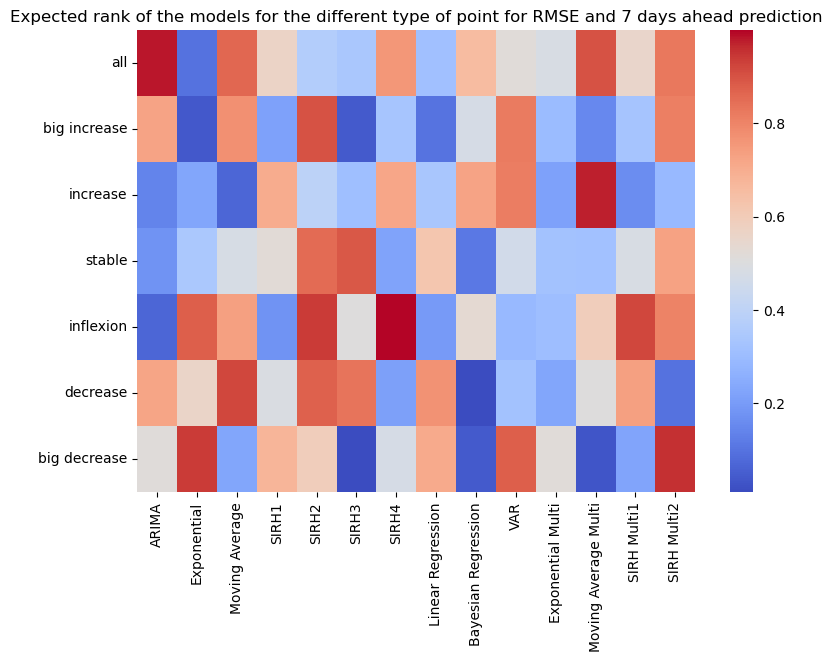

In [85]:
df_expected_ranks=pd.DataFrame(columns= list_of_models, index = ['all','big increase', 'increase' , 'stable', 'inflexion', 'decrease', 'big decrease'] )
for ind in df_expected_ranks.index: 
    df_expected_ranks.loc[ind]=[np.random.random() for i in range(len(list_of_models))]



plt.figure(figsize=(9,6))
sns.heatmap(df_expected_ranks.astype(float), cmap='coolwarm')
xticks = list_of_models
yticks = ['all', 'big increase', 'increase', 'stable', 'inflexion', 'decrease', 'big decrease']
plt.xticks(ticks=[i+0.5 for i in range(len(xticks))], labels=xticks, rotation=90)
plt.yticks(ticks=[i+0.5 for i in range(len(yticks))], labels=yticks)
plt.title('Expected rank of the models for the different type of point for '+str(loss)+' and '+str(reach)+' days ahead prediction')
plt.show()

In [117]:
perfs=[i for i in range(14)]
print(perfs)
perfs.pop(7)
print(perfs)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13]


In [ ]:
model_type='1D'
loss='RMSE'
reach='7'
for loss in ['RMSE', 'WIS']: 
    for reach in ['7', '14']:
        df_expected_ranks=pd.DataFrame(columns= list_of_models, index = ['all','big increase', 'increase' , 'stable', 'inflexion', 'decrease', 'big decrease'] )



        for label_point in ['all','big increase', 'increase' , 'stable', 'inflexion', 'decrease', 'big decrease']:
            list_of_models= models1Dnames+models3Dnames 
            list_of_models.remove('Moving Average Multi')

            all_ranks=np.zeros((len(list_of_models), len(list_of_models)))
            results_list=[ name for name in os.listdir('./results/global_evaluation_from_zero_corrected/') if loss in name and '1D' in name and 'reach_='+str(reach) in name   ] # results of the models
            for name in results_list :
                mob=int(name.split('_')[-5])
                pand=int(name.split('_')[-4])
                dicoresults1=df_to_dict(pd.read_csv('./results/global_evaluation_from_zero_corrected/'+name))
                dicoresults2=df_to_dict(pd.read_csv('./results/global_evaluation_from_zero_corrected/'+name.replace('1D', '3D')))
                dicoresults=concat_dico(dicoresults1, dicoresults2)
                df=pd.read_csv('./all_pandemics/pandemic_'+name.split('_')[-5]+'_'+name.split('_')[-4]+'.csv')
                df.index=['n_hospitalized', 'n_infectious', 'mobility', 'r_eff']
                df.drop(['Unnamed: 0'], axis=1, inplace=True)
                n_hospitalized = np.array(df.loc['n_hospitalized'])
                indexs_points=[[20*i] for i in range(1, 15) ] 
                prediction=pd.read_csv('./results/predictions_of_the_models_corrected/predictions_'+str(reach)+'_days_on_pandemic_'+str(mob)+'_'+str(pand)+'.csv')
                prediction.drop(['Unnamed: 0'], axis=1, inplace=True)
                prediction.index=[20*i for i in range(1, 15)]
                prediction_bis=prediction.drop(['Real values', 'Exponential', 'Exponential Multi'], axis=1)
                prediction_all=prediction
                prediction=prediction_bis
                for point in indexs_points: 
                    if label_point=='all': 
                        real_value=prediction_all['Real values'].loc[point[0]]
                        perfs=dicoresults[str(point)]
                        assert(len(perfs)==14)
                        assert(abs(perfs[2] - perfs[11]) < 0.001, (perfs[2], perfs[11])) 
                        perfs.pop(11) # remove the moving average multi
                        assert(len(perfs)==13)
                        rankings=get_classement(perfs)
                        for i in range(len(rankings)): 
                            rank_model_i=rankings[i]
                            all_ranks[i][rank_model_i]+=1

                    elif classify(point[0], n_hospitalized) == label_point :
                        real_value=prediction_all['Real values'].loc[point[0]]
                        perfs=dicoresults[str(point)]
                        assert(len(perfs)==14)
                        assert(abs(perfs[2] - perfs[11]) < 0.001, (perfs[2], perfs[11])) 
                        perfs.pop(11) # remove the moving average multi
                        assert(len(perfs)==13)
                        rankings=get_classement(perfs)
                        for i in range(len(rankings)): 
                            rank_model_i=rankings[i]
                            all_ranks[i][rank_model_i]+=1
                        


            fig, axs = plt.subplots(len(list_of_models), figsize=(8, 12))     
            expected_ranks=[np.sum((np.array(all_ranks[i])/np.sum(np.array(all_ranks[i])))*np.array([i for i in range( len(rankings))])) for i in range(len(rankings))]   
             
            for i in range(len(rankings)):   
                axs[i].bar([j for j in range(len(rankings))], np.array(all_ranks[i])/np.sum(np.array(all_ranks[i])), edgecolor='black', width = 0.5)
                axs[i].set_yticks([ round(np.max(np.array(all_ranks[i])/np.sum(np.array(all_ranks[i]))), 1) ])
                axs[i].set_ylim(bottom = 0 , top = (np.max(np.array(all_ranks[i])/np.sum(np.array(all_ranks[i]))))*1.2)
                axs[i].set_ylabel(list_of_models[i], labelpad=30)
                axs[i].yaxis.label.set_rotation(45)
                if i != len(rankings)-1:
                    axs[i].set_xticks([])
                else : 
                    axs[i].set_xticks([j for j in range(len(rankings))])
                    axs[i].set_xlabel('Rank'  )
                fig.suptitle('Distribution of the ranks of each model for '+label_point+' points for '+loss+' and '+reach+' days ahead prediction.')

            plt.show()
            plt.figure(figsize=(10, 6))
            exp_copy=expected_ranks.copy()
            expected_ranks.sort()
            df_expected_ranks.loc[label_point]=exp_copy
            plt.bar(sort_list(list_of_models, exp_copy), expected_ranks, edgecolor='black')
            plt.xticks(rotation=90)
            plt.title('Expected rank of each model for '+label_point+' points for '+loss+' and '+reach+' days ahead prediction.')
            plt.show()
        
        plt.figure(figsize=(9,6))
        sns.heatmap(df_expected_ranks.astype(float), cmap='coolwarm', annot=True, fmt=".1f")
        xticks = list_of_models
        yticks = ['all', 'big increase', 'increase', 'stable', 'inflexion', 'decrease', 'big decrease']
        plt.xticks(ticks=[i+0.5 for i in range(len(xticks))], labels=xticks, rotation=90)
        plt.yticks(ticks=[i+0.5 for i in range(len(yticks))], labels=yticks)
        plt.title('Expected rank of the models for the different types of point for '+str(loss)+' and '+str(reach)+' days ahead prediction')
        plt.show()

Ensemble model only possible for RMSE

R2 :  0.9783304926115541
Coefficients :  [ 5.31519586e-01 -8.18934348e-02  2.93756991e-02  9.86440599e-02
  1.01110326e-01  5.97865524e-02  1.59776310e-06  4.88526632e-02
  2.36113194e-01 -8.18934348e-02  9.45288153e-03 -1.68941860e-03]
Intercept :  117.80515360254003


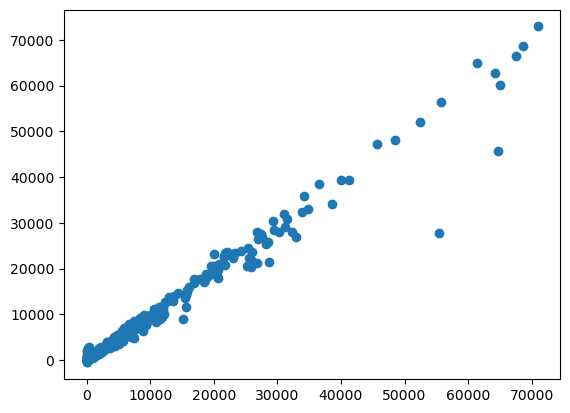

0.9493802723998012


In [29]:
concatenated_train=pd.DataFrame(columns =[name for name in  models1Dnames + models3Dnames + ['Real values'] if 'xponential' not in name ])
concatenated_test=pd.DataFrame(columns =[name for name in  models1Dnames + models3Dnames + ['Real values'] if 'xponential' not in name ])
names = [name for name in os.listdir('./results/predictions_of_the_models_corrected/') if '7_days' in name]
names_train=[]
names_test=[]
np.random.seed(0)
for name in names : 

    prediction=pd.read_csv('./results/predictions_of_the_models_corrected/'+name)
    prediction.drop(['Unnamed: 0'], axis=1, inplace=True)
    prediction.drop(['Exponential'], axis=1, inplace=True)
    prediction.drop(['Exponential Multi'], axis=1, inplace=True)
    # prediction.drop(['VAR'], axis=1, inplace=True)
    
    prediction.index=[20 * i for i in range(1, 15)]
    if np.random.rand() < 0.8 : 
        names_train.append(name)
        concatenated_train=concat_df(concatenated_train, prediction)
    else :
        names_test.append(name)
        concatenated_test=concat_df(concatenated_test, prediction)
matrix_train=np.array(concatenated_train)
matrix_test=np.array(concatenated_test)



# regression lineaire pour prédire la dernière colonne de matric avec les autres : 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
# rl : 
X_train=matrix_train[:,:-1]
y_train=matrix_train[:,-1]
X_test=matrix_test[:,:-1]
y_test=matrix_test[:,-1]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=432)
regressor=LinearRegression()
regressor.fit(X_train, y_train)
y_pred=regressor.predict(X_test)
print('R2 : ', r2_score(y_test, y_pred))
print('Coefficients : ', regressor.coef_)
print('Intercept : ', regressor.intercept_)
plt.plot(y_test, y_pred, 'o')
plt.show()
print(np.sum(regressor.coef_))

In [16]:
def is_in_test_set(name): 
    for elt in names_test : 
        if str(name.split('_')[-5] ) + '_' + str(name.split('_')[-4]) in elt : 
            return True
    return False


<>:42: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:58: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:42: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:58: SyntaxWarning: assertion is always true, perhaps remove parentheses?
C:\Users\grego\AppData\Local\Temp\ipykernel_21416\3360274469.py:42: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(abs(perfs[2] - perfs[11]) < 0.001, (perfs[2], perfs[11]))
C:\Users\grego\AppData\Local\Temp\ipykernel_21416\3360274469.py:58: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(abs(perfs[2] - perfs[11]) < 0.001, (perfs[2], perfs[11]))


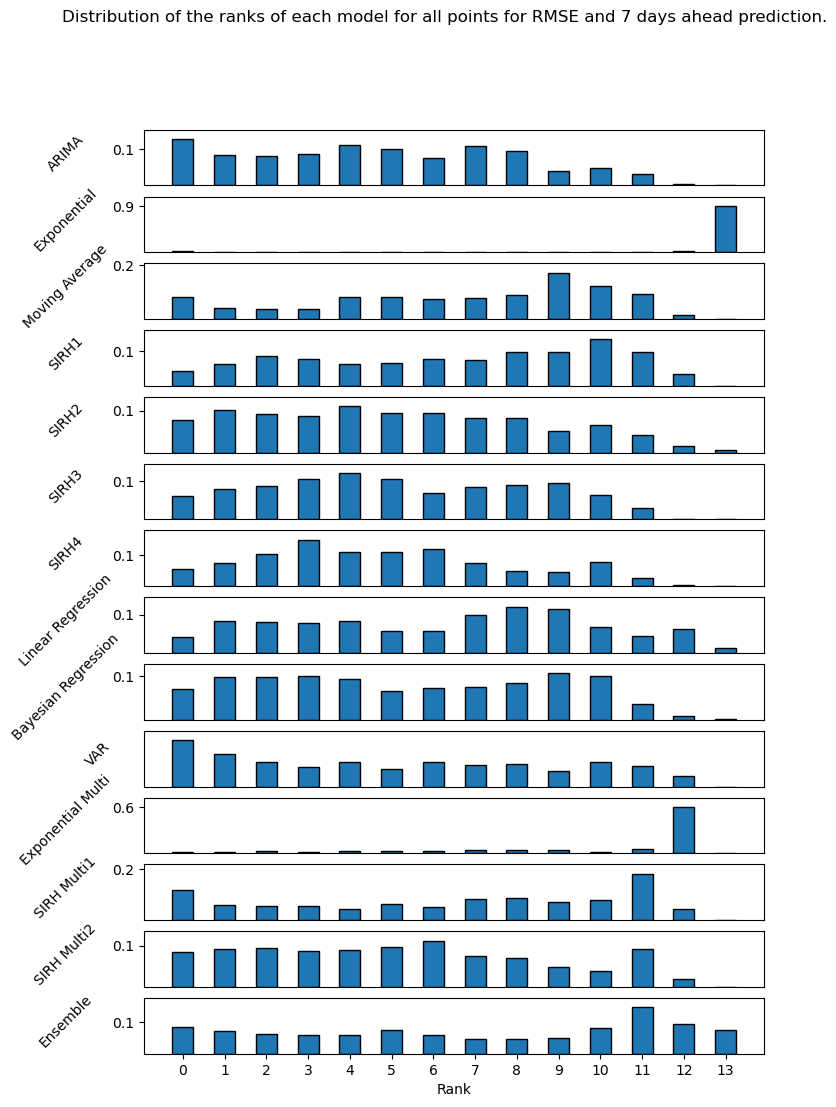

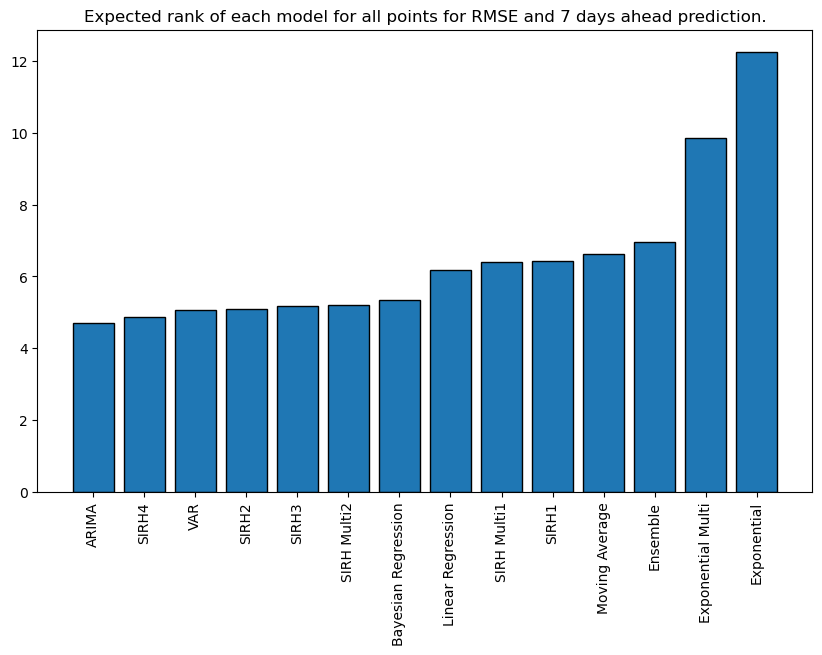

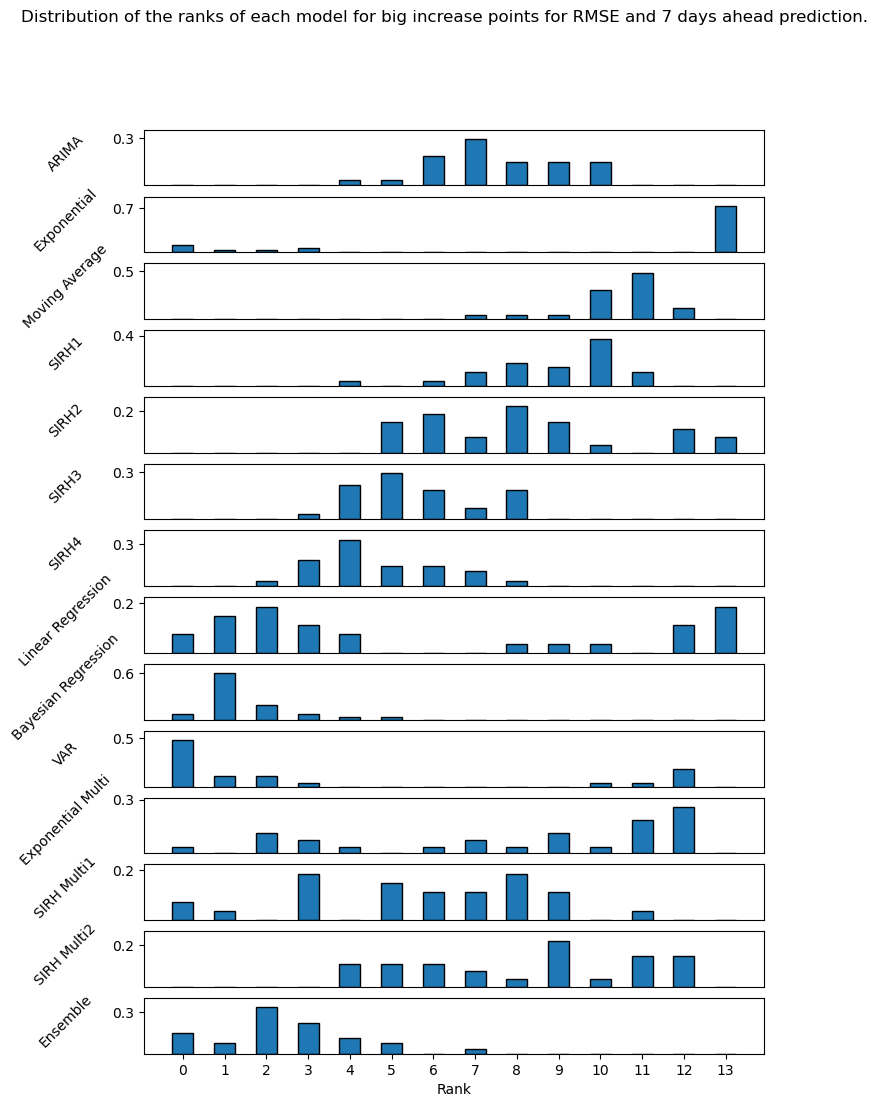

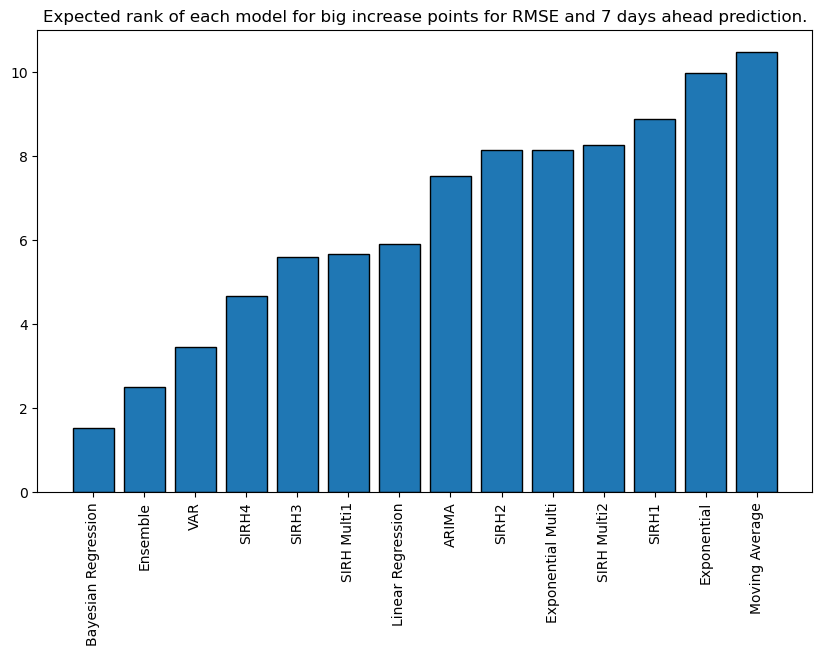

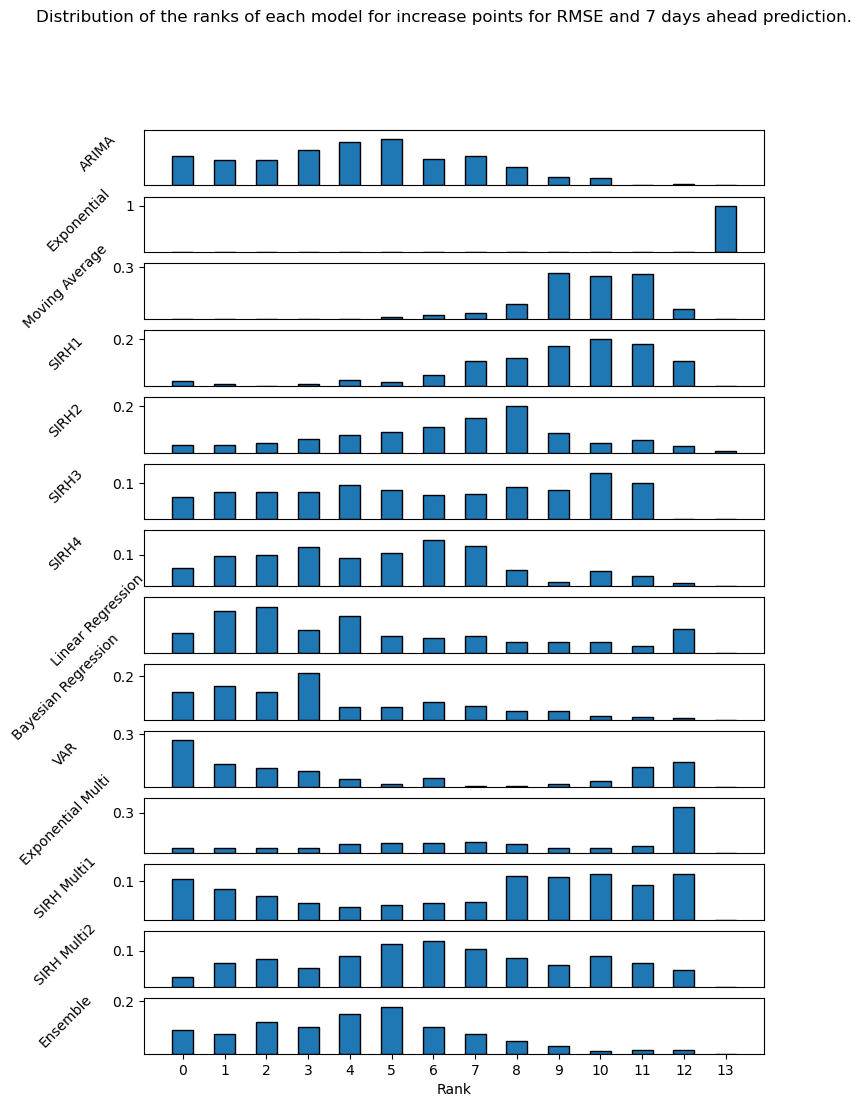

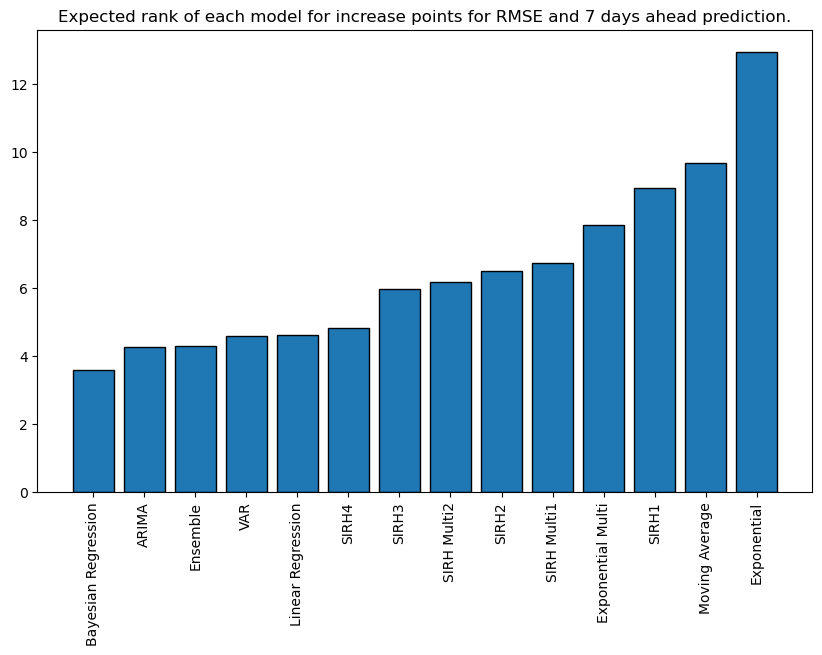

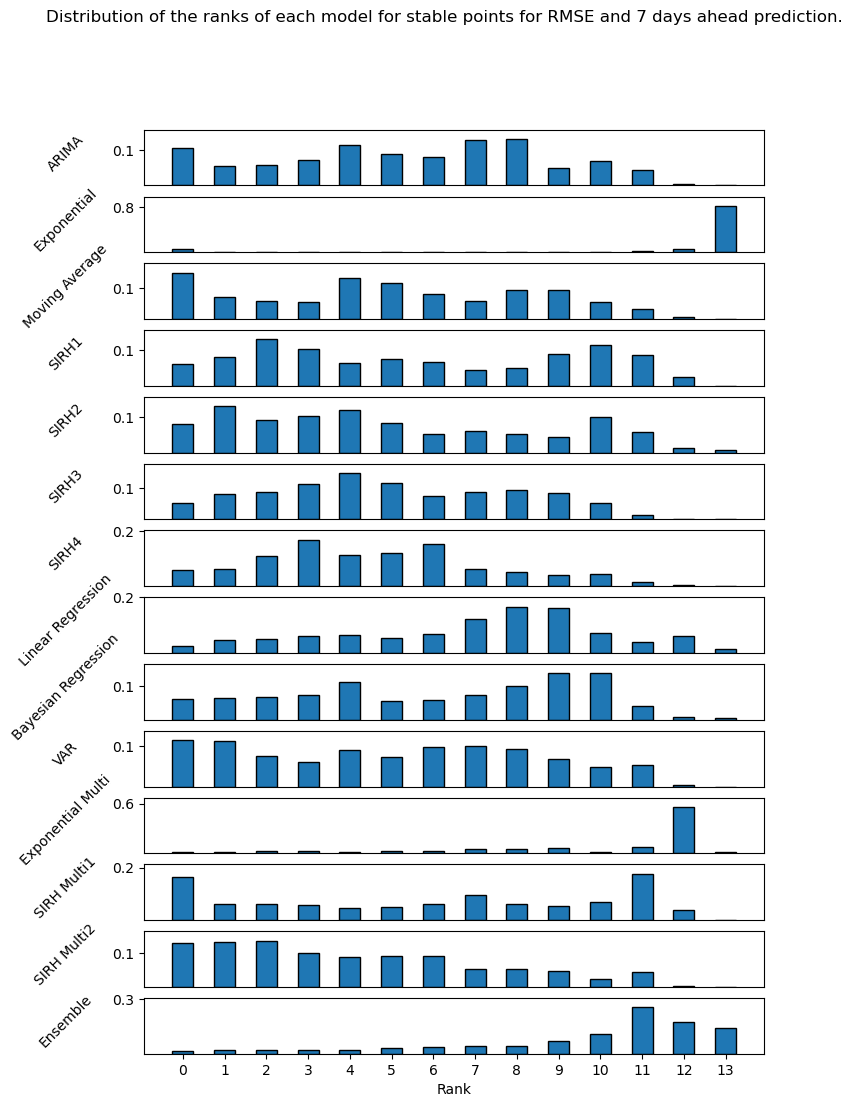

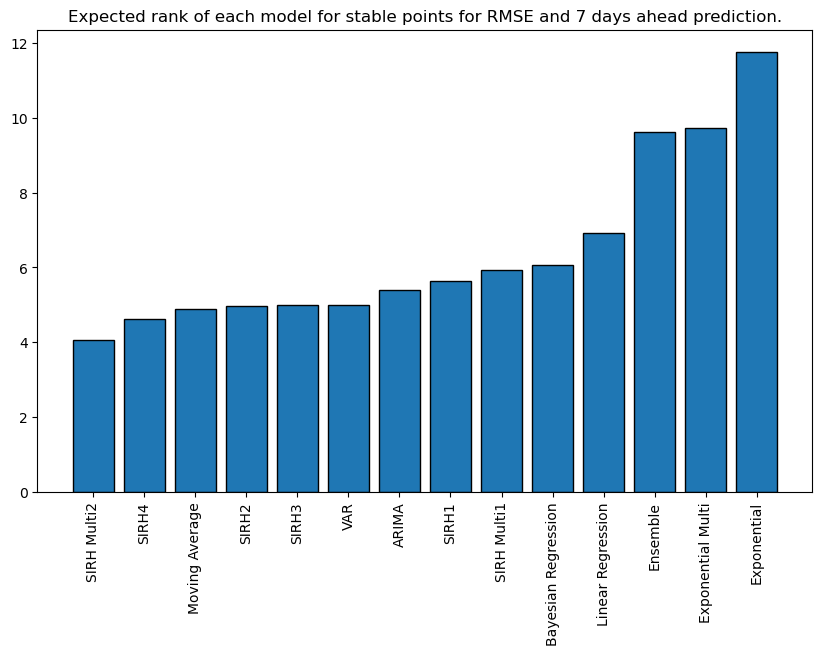

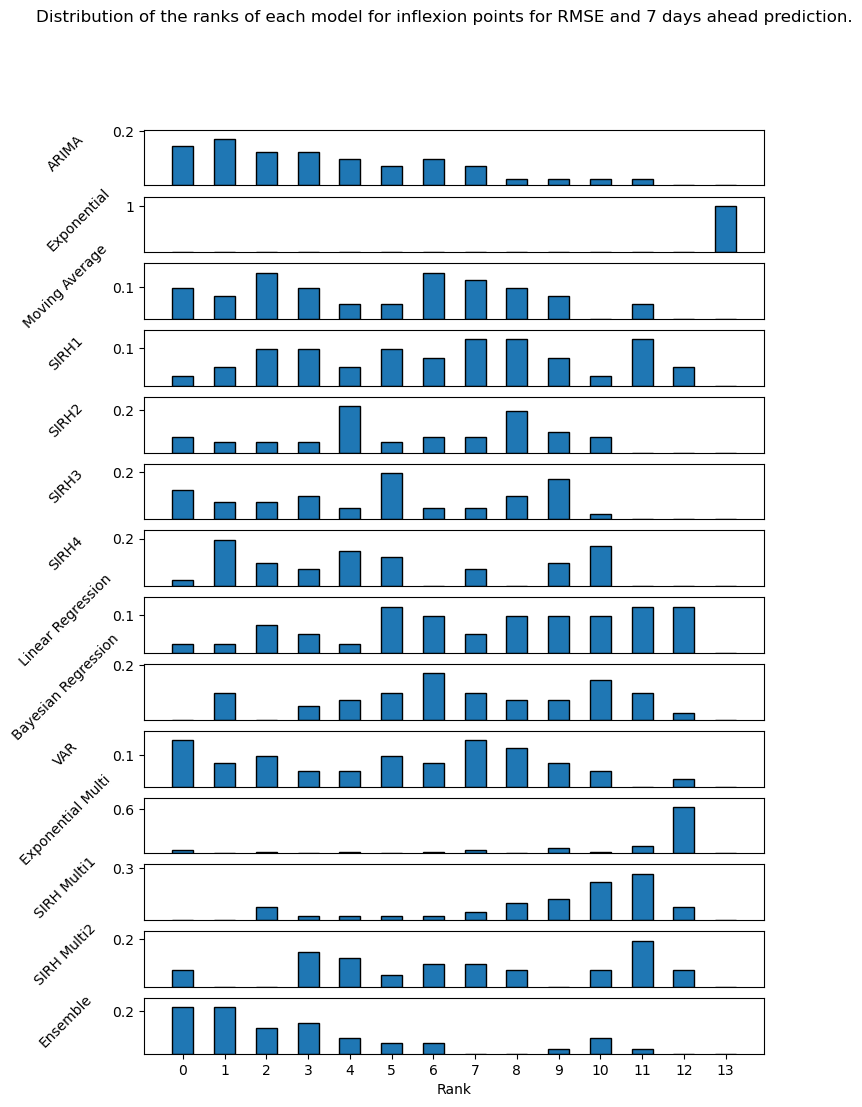

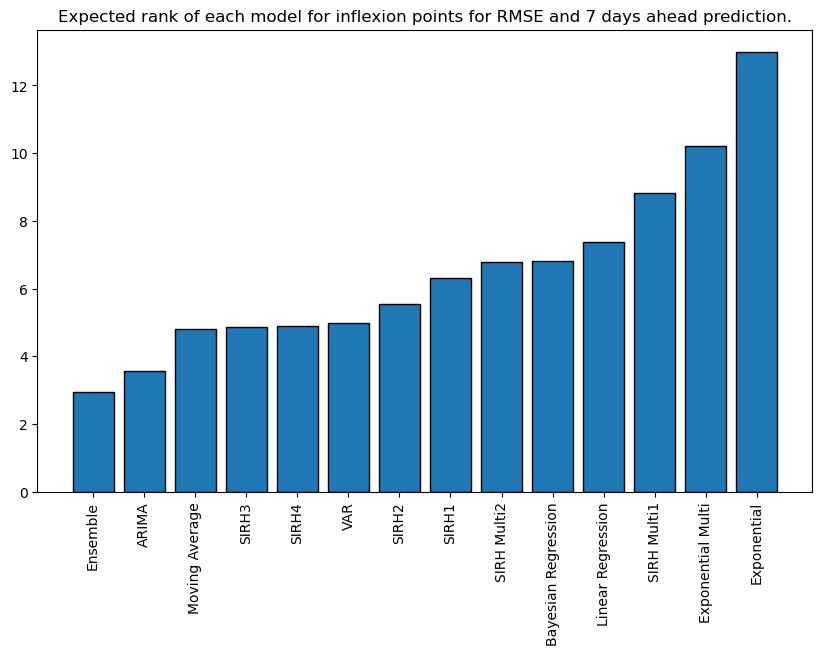

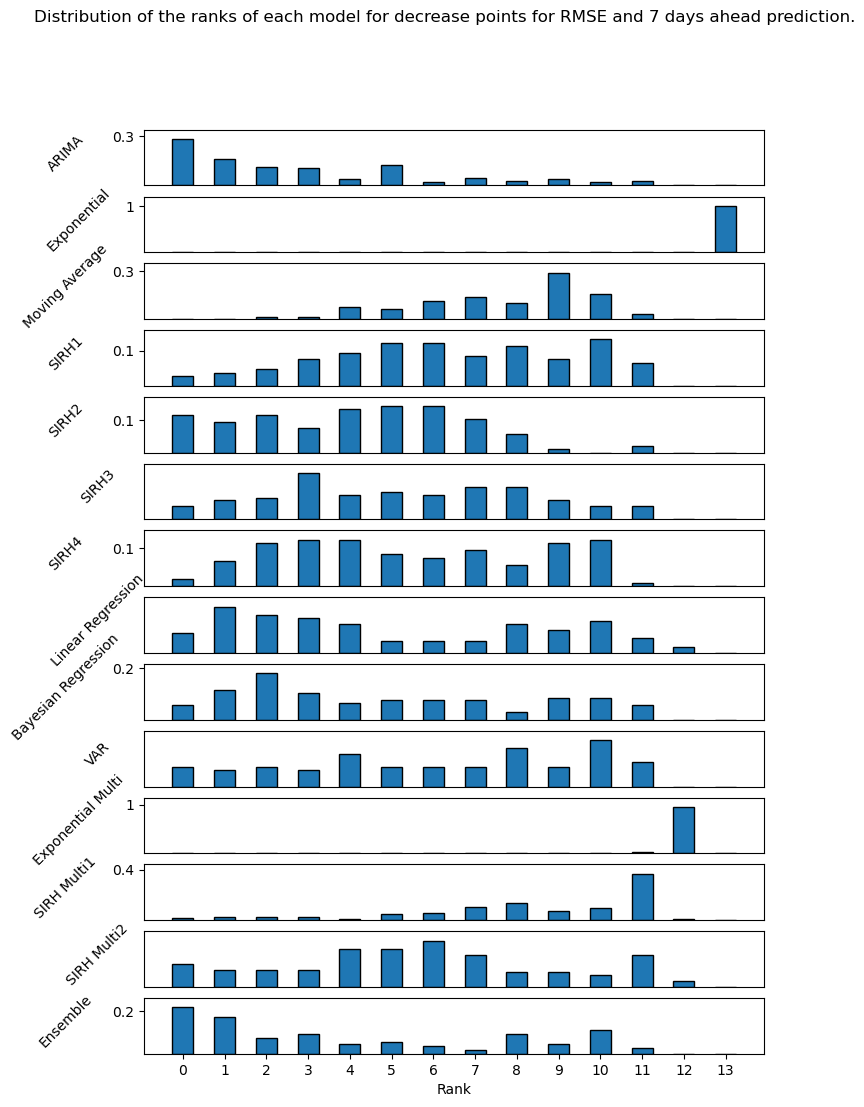

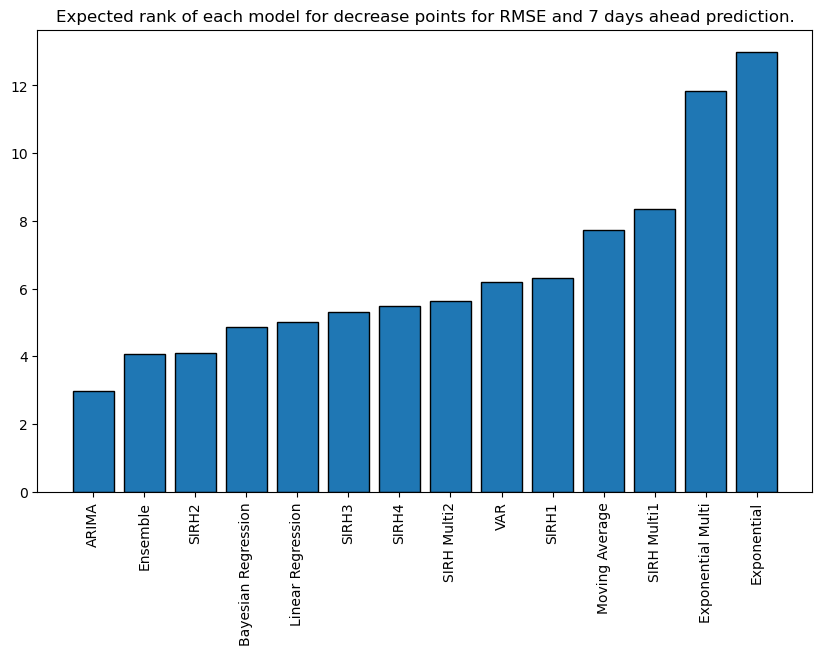

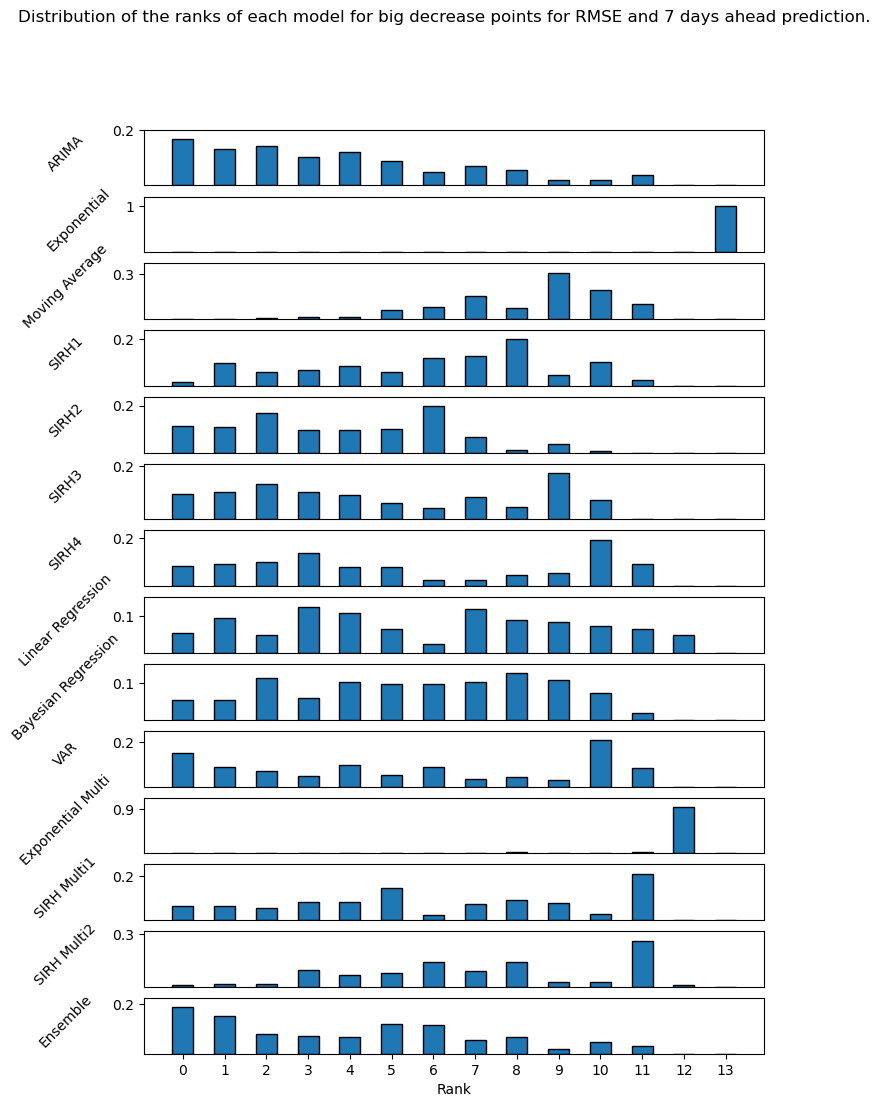

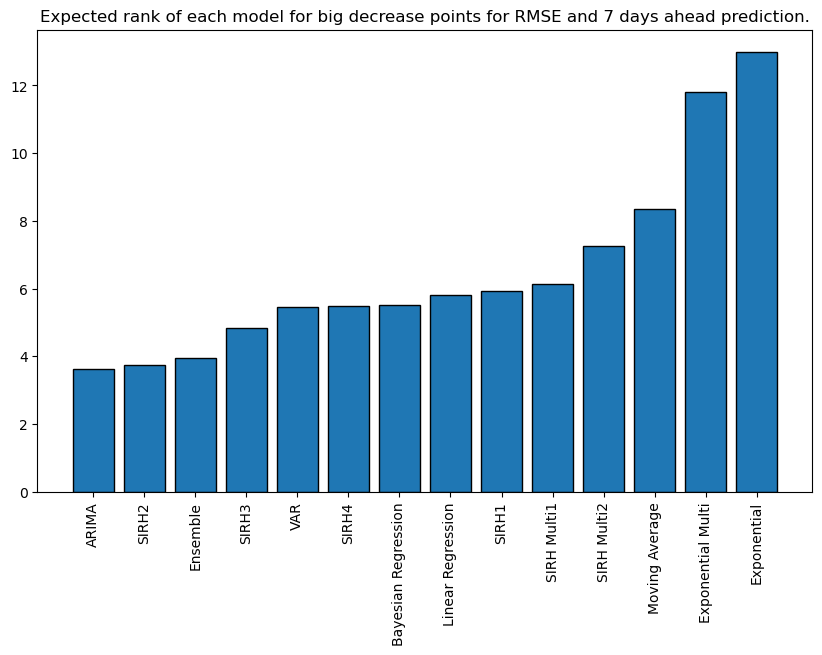

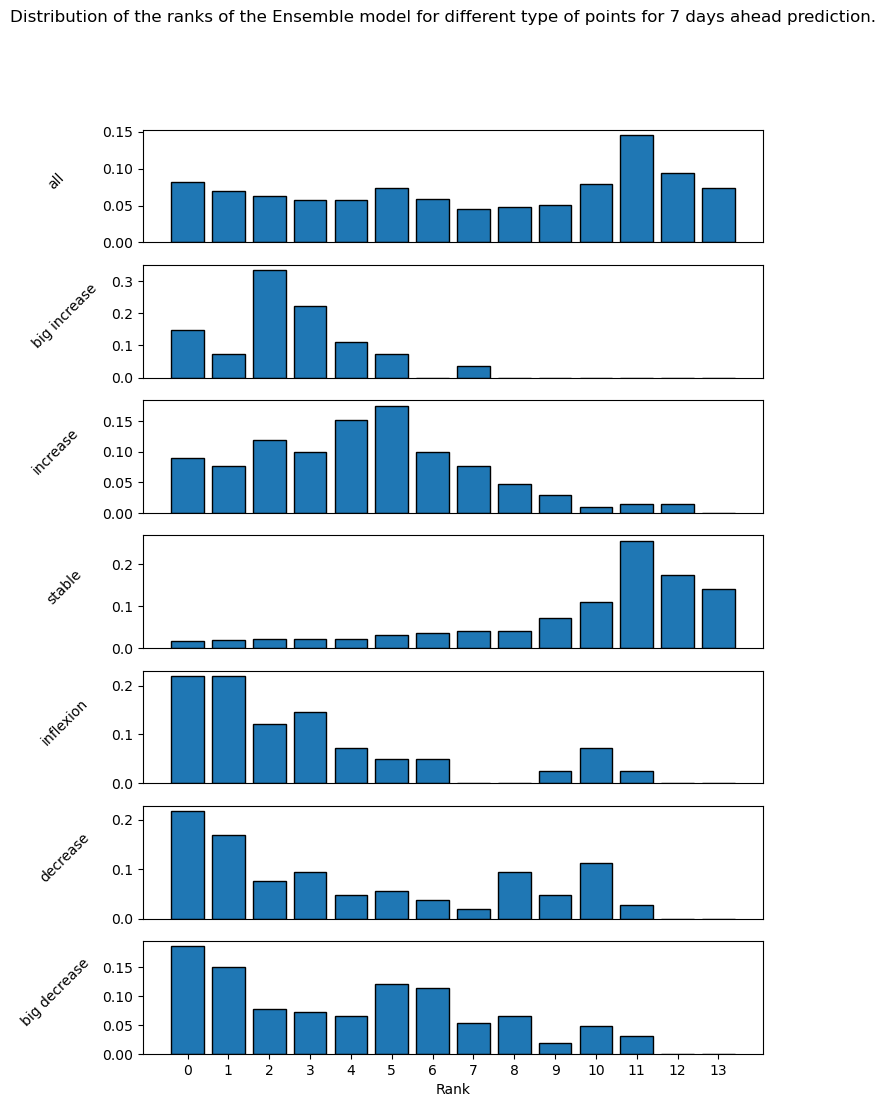

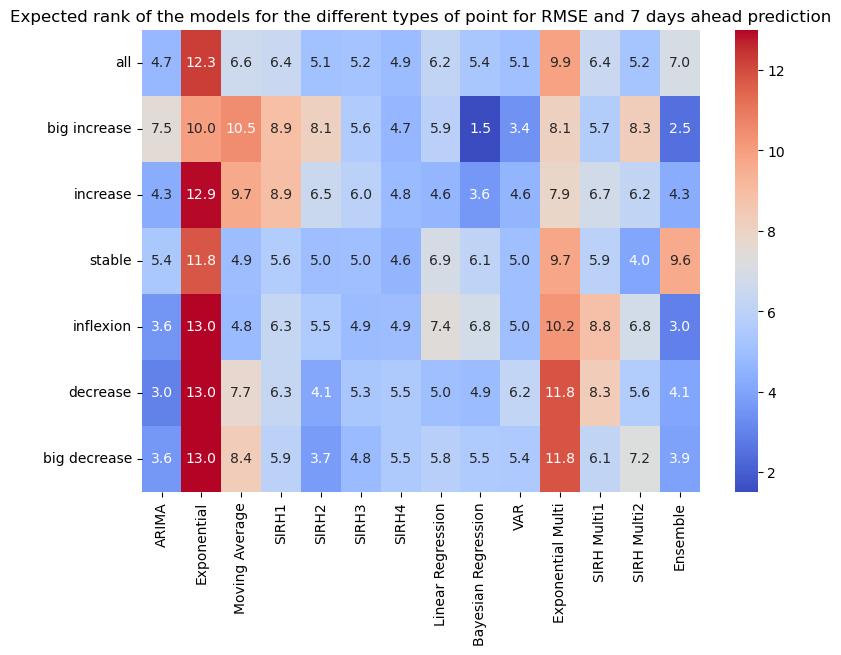

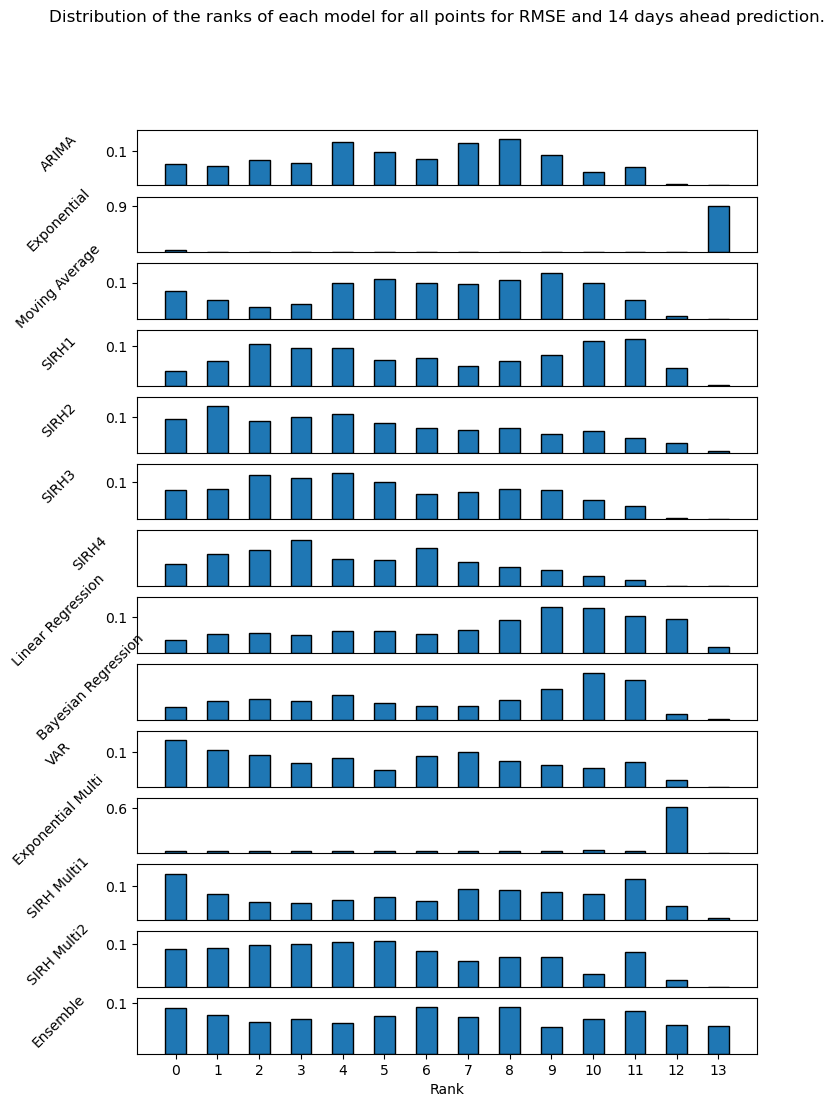

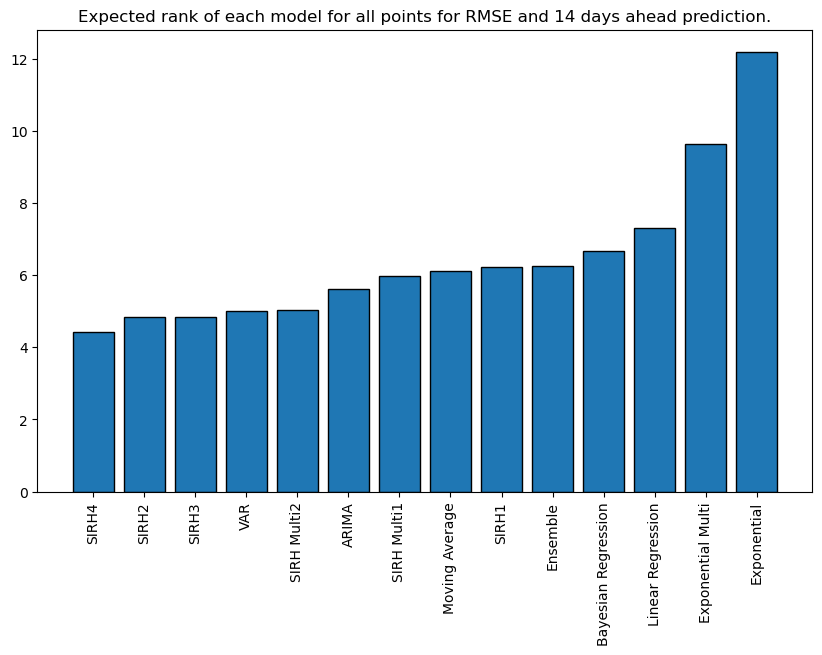

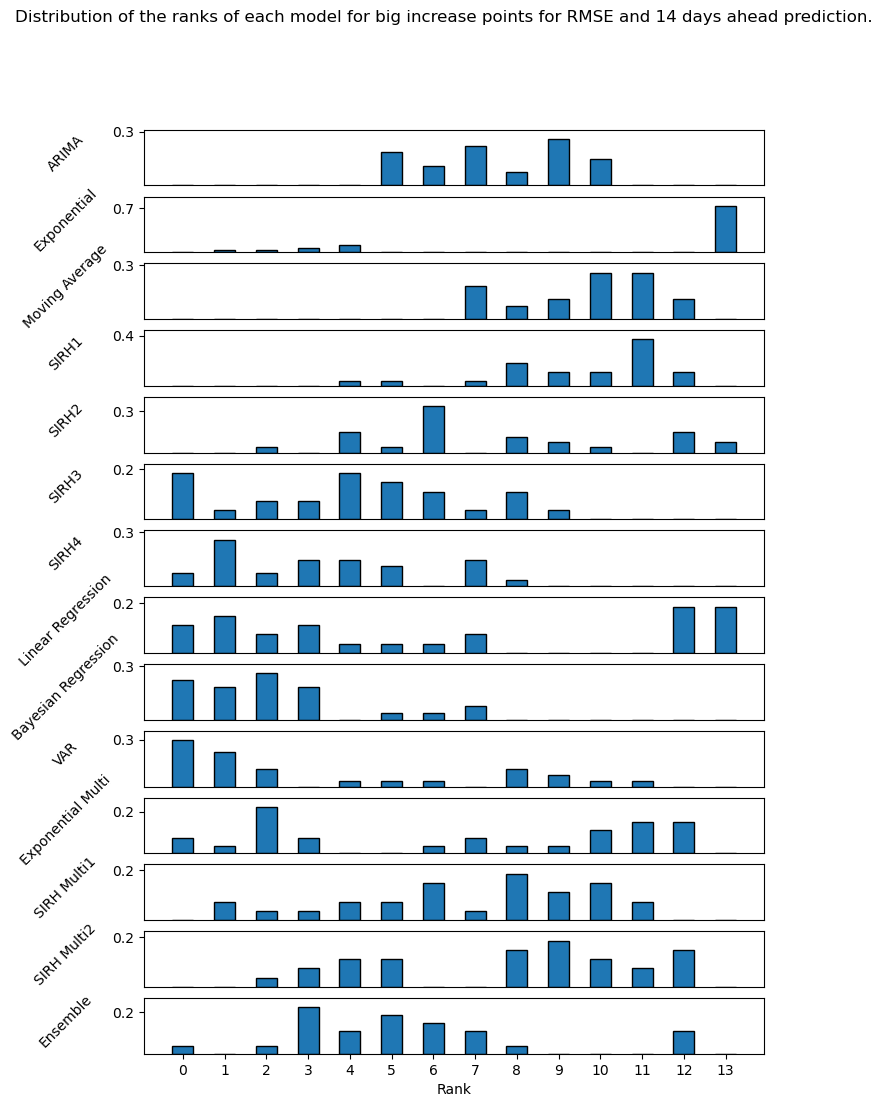

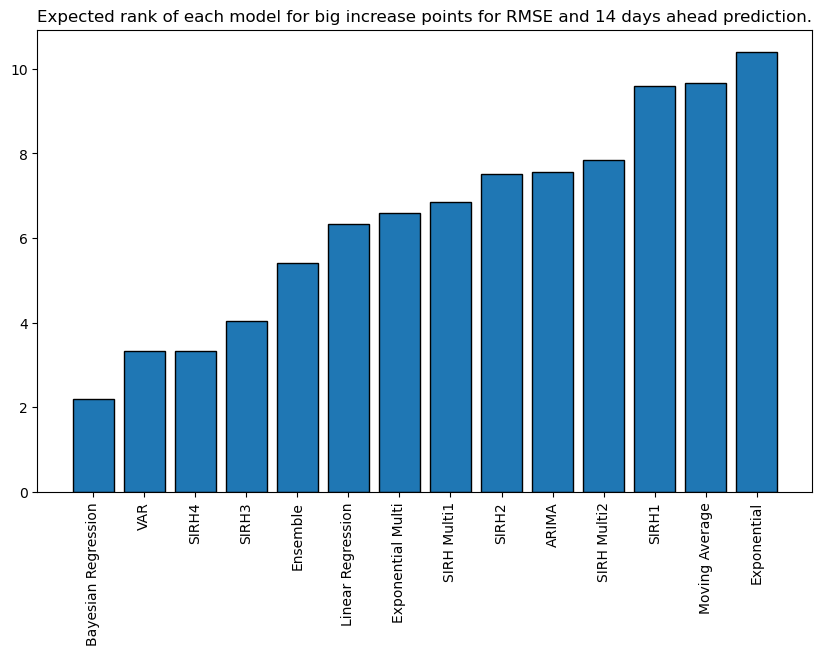

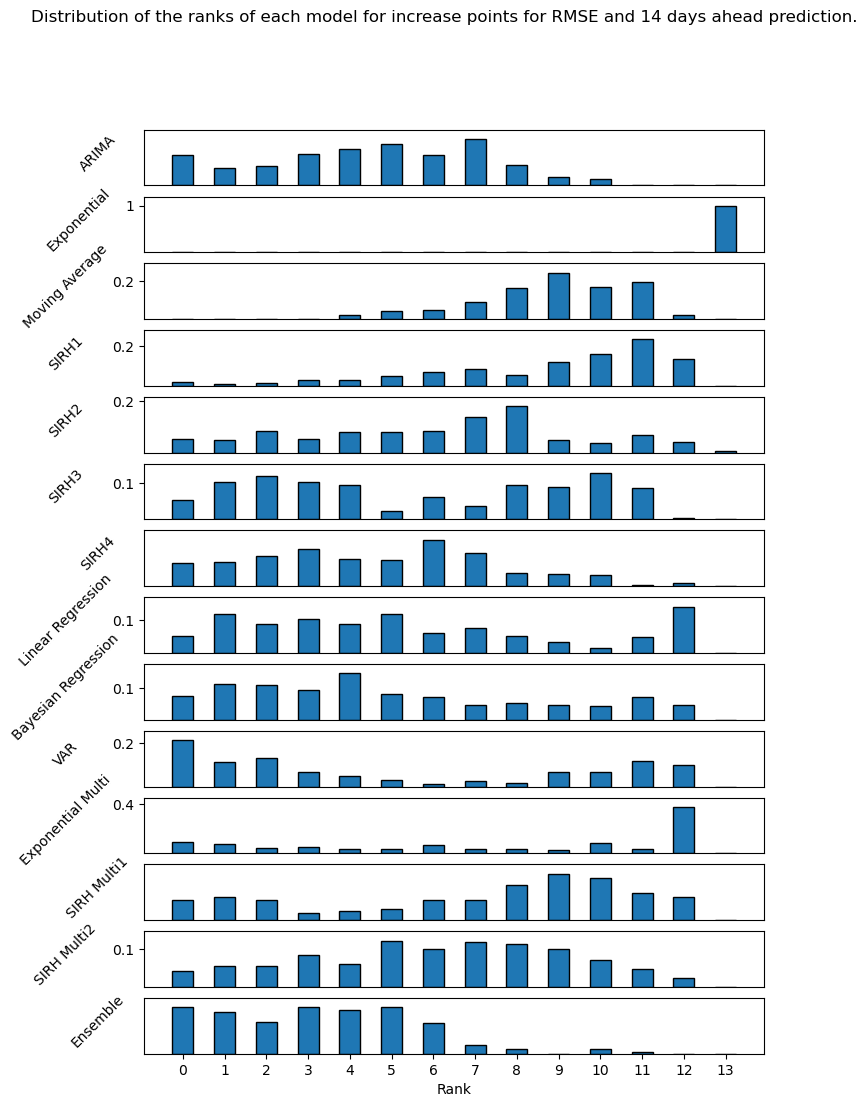

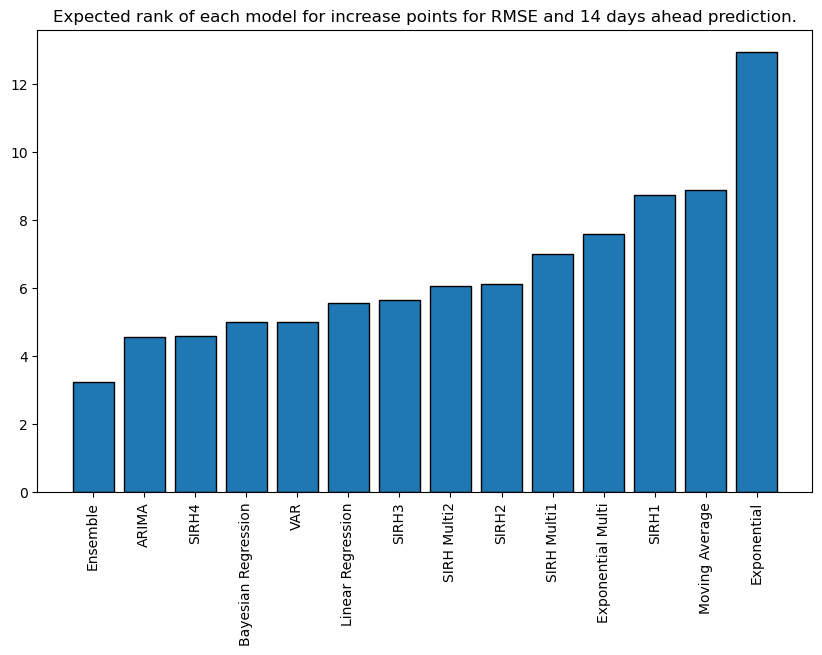

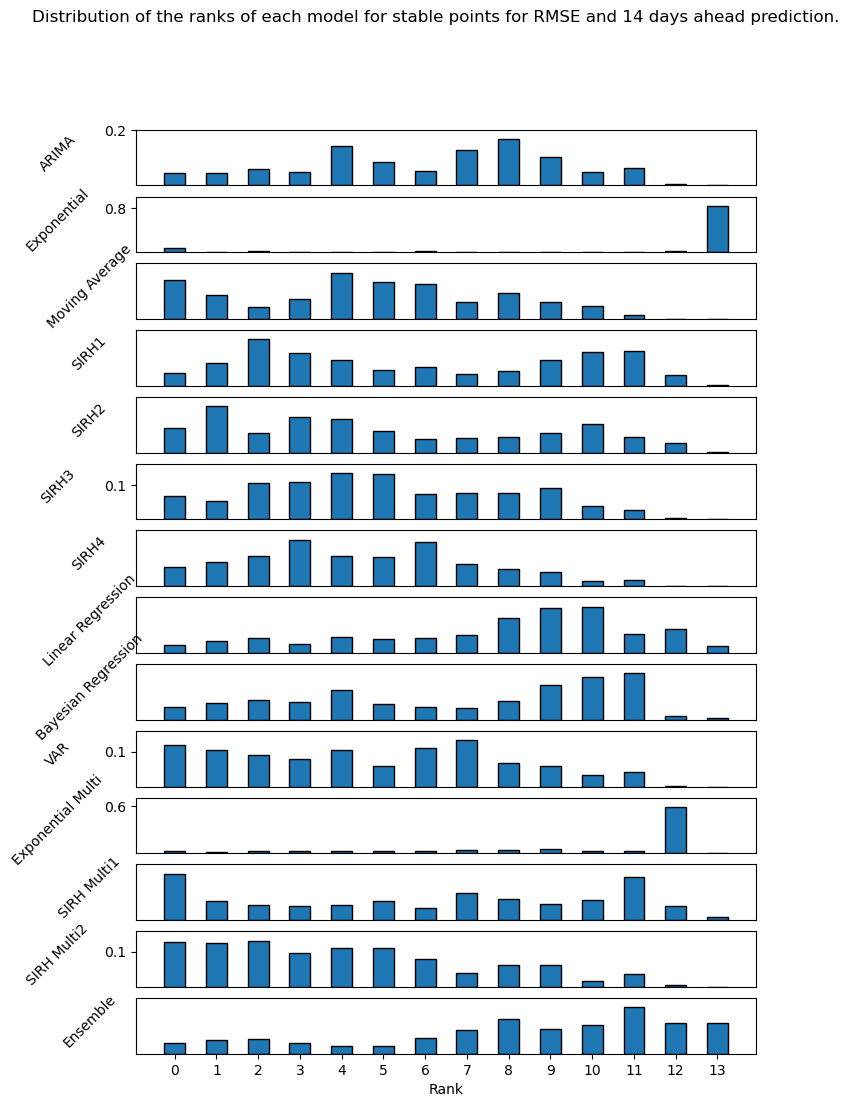

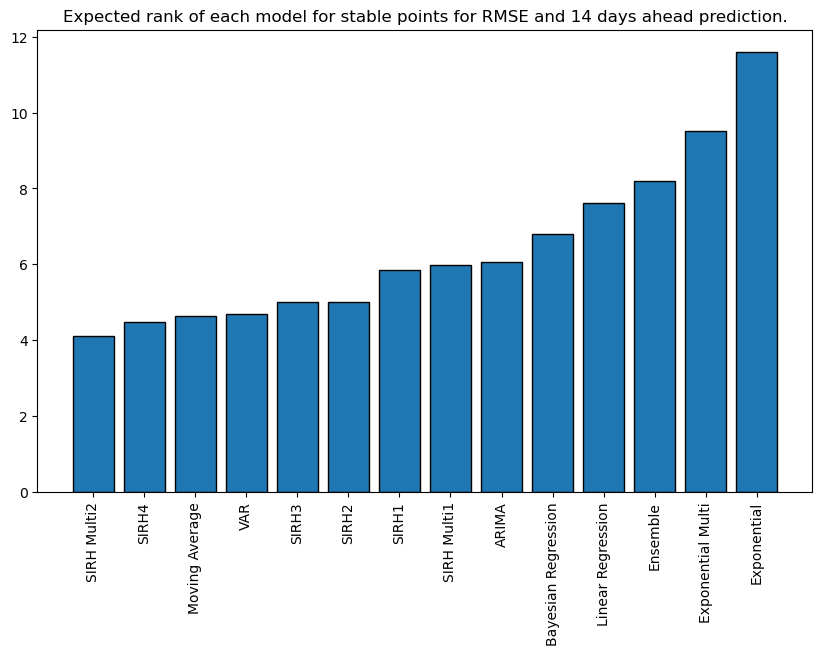

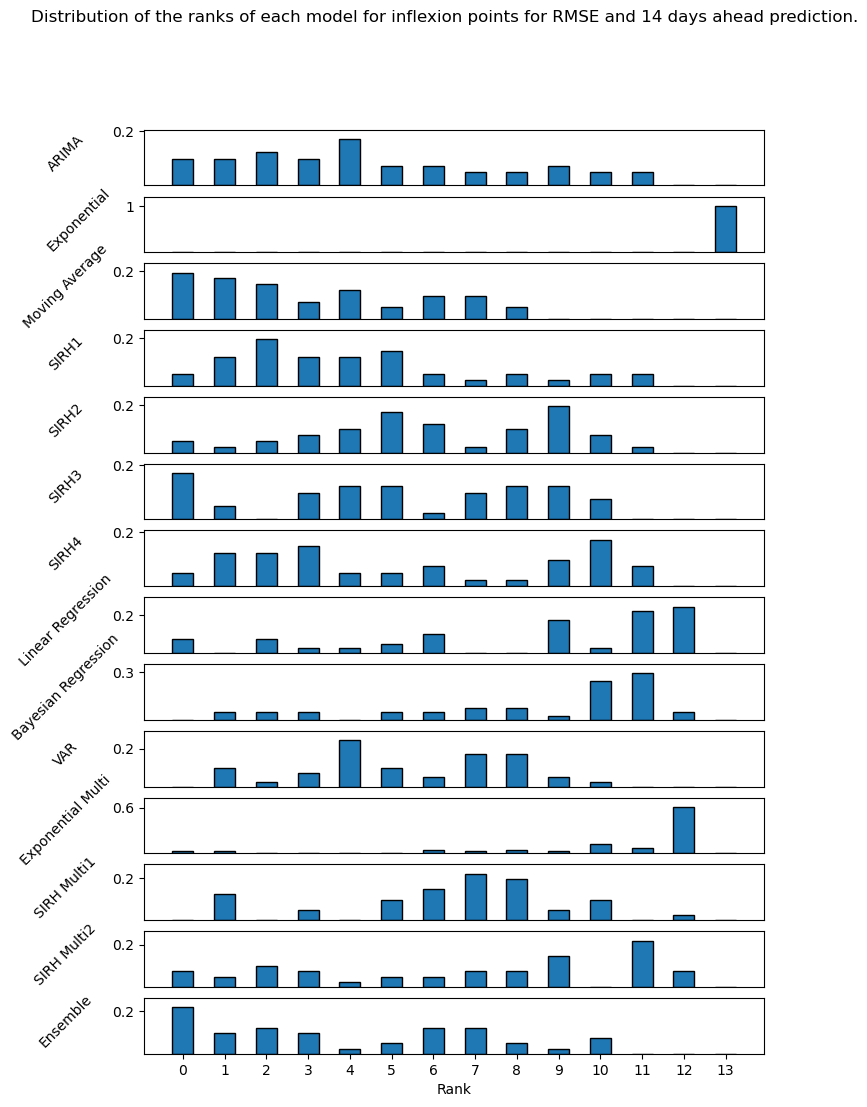

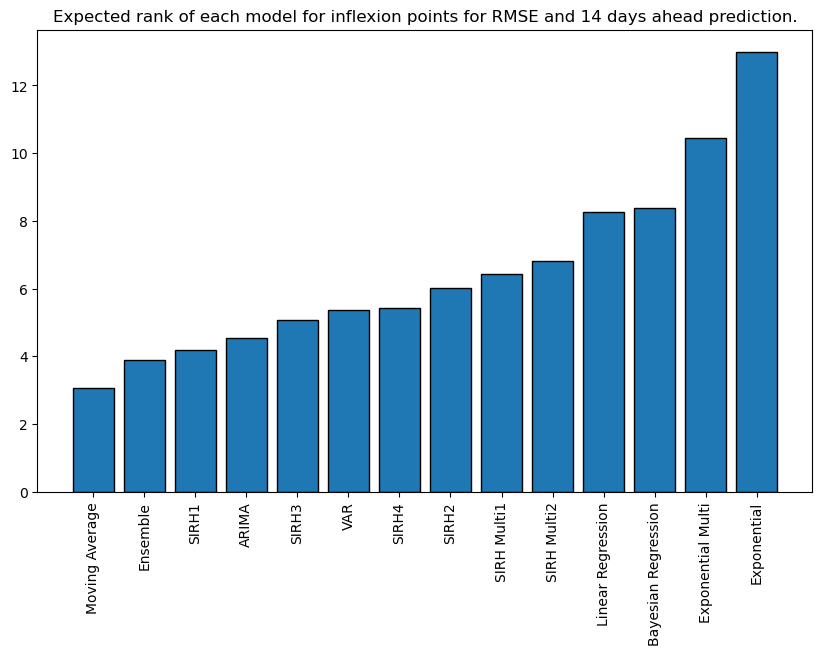

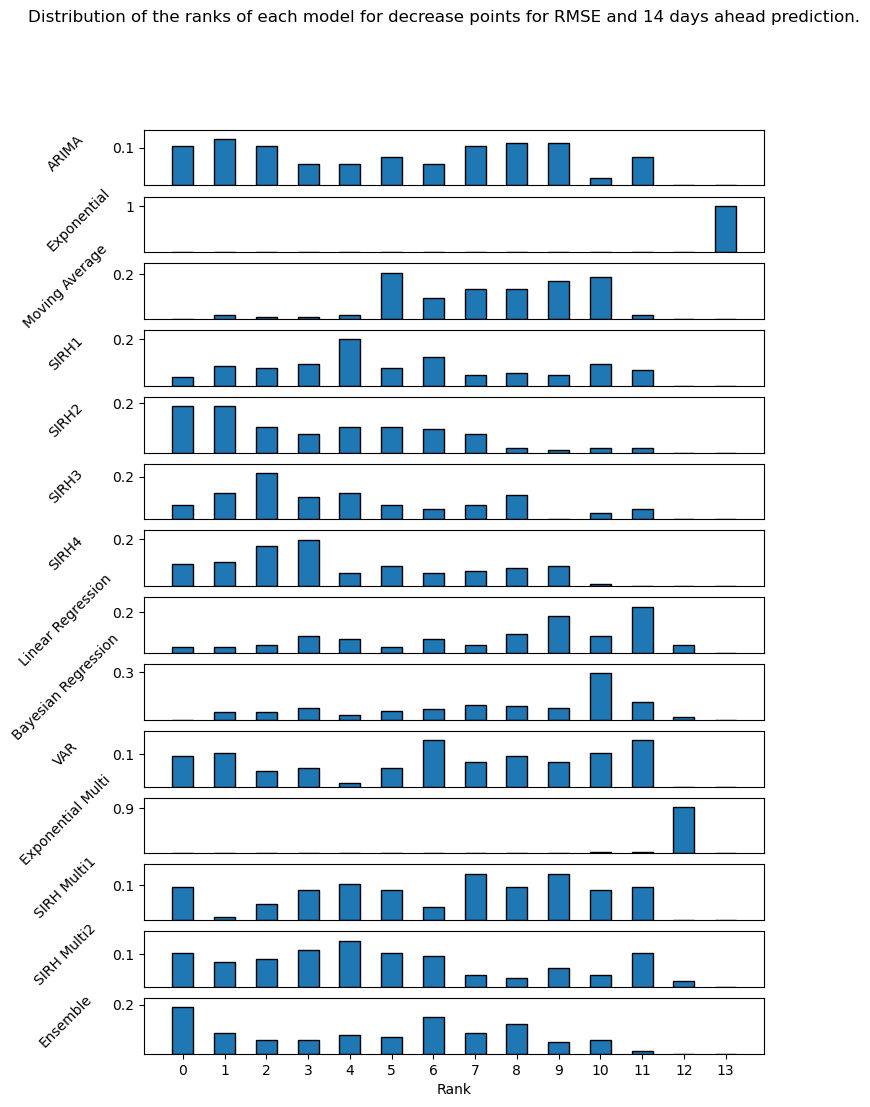

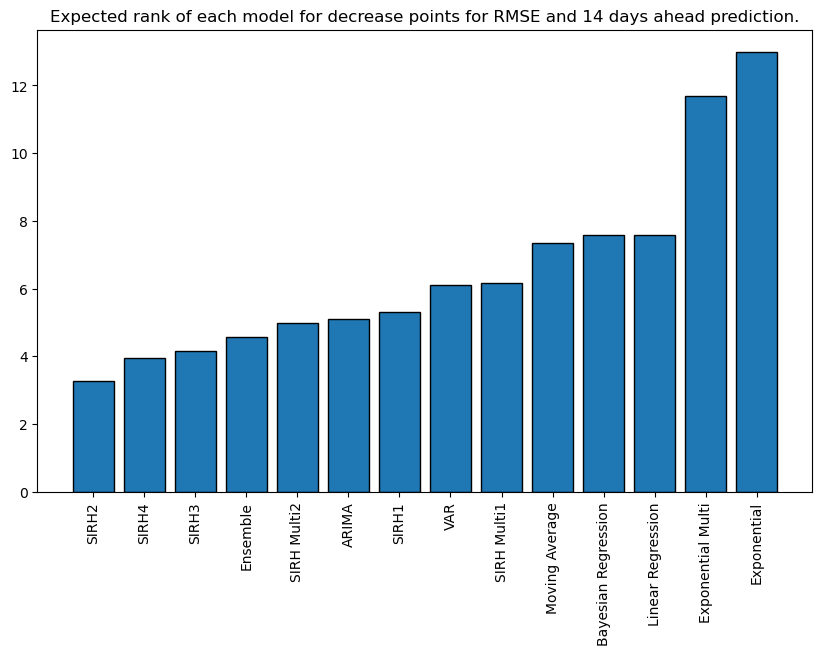

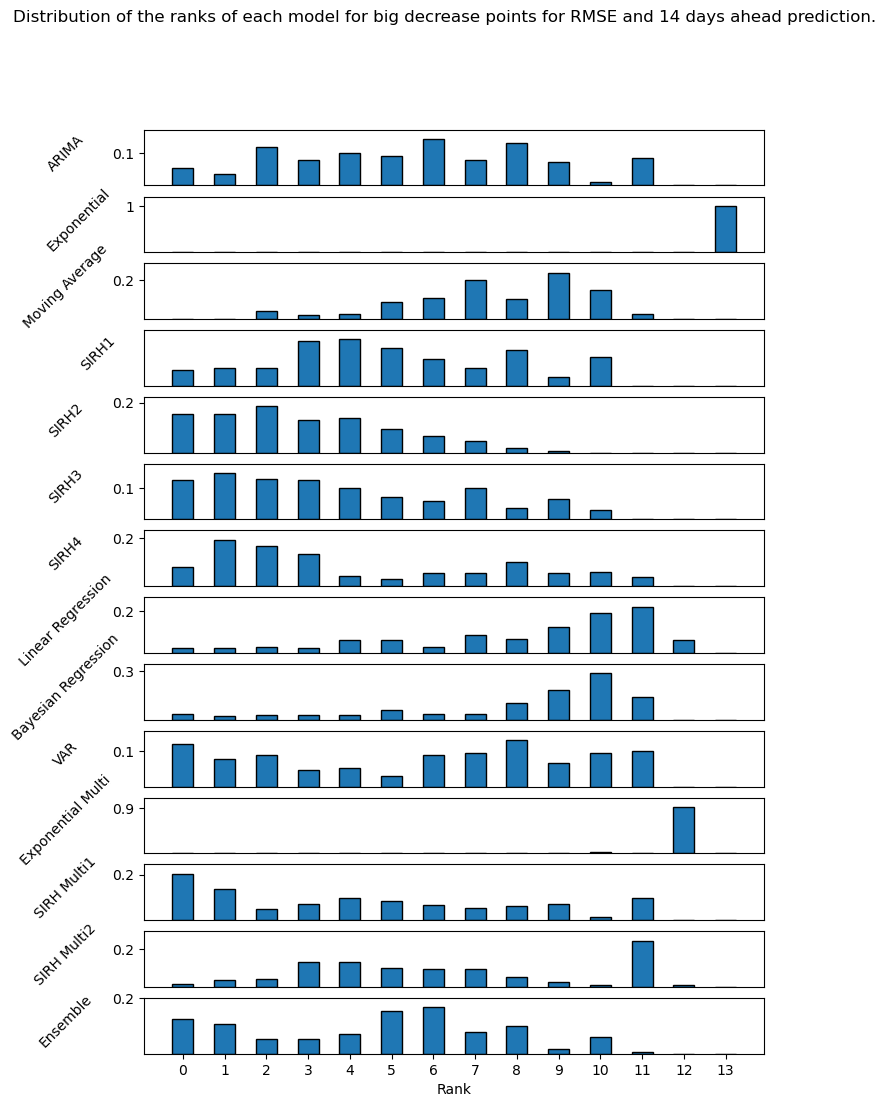

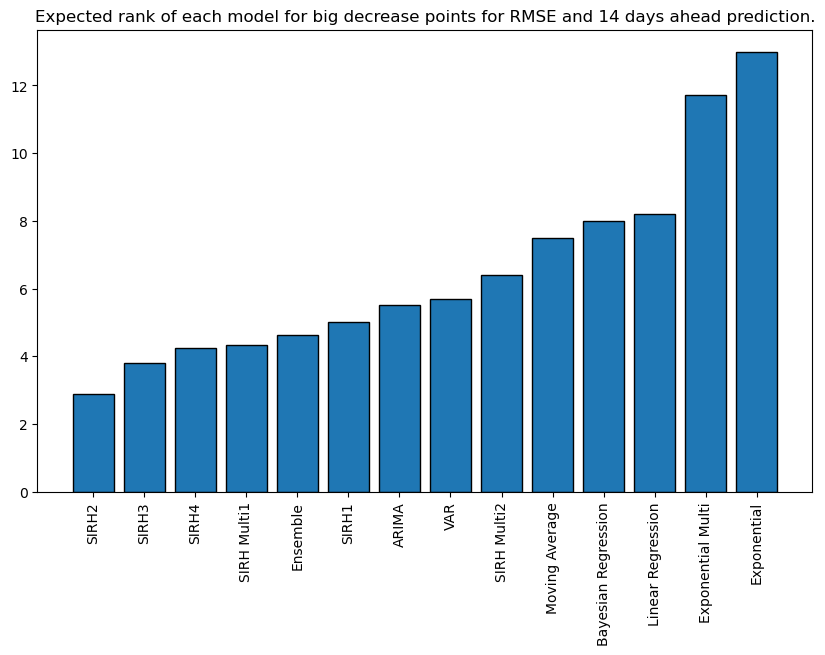

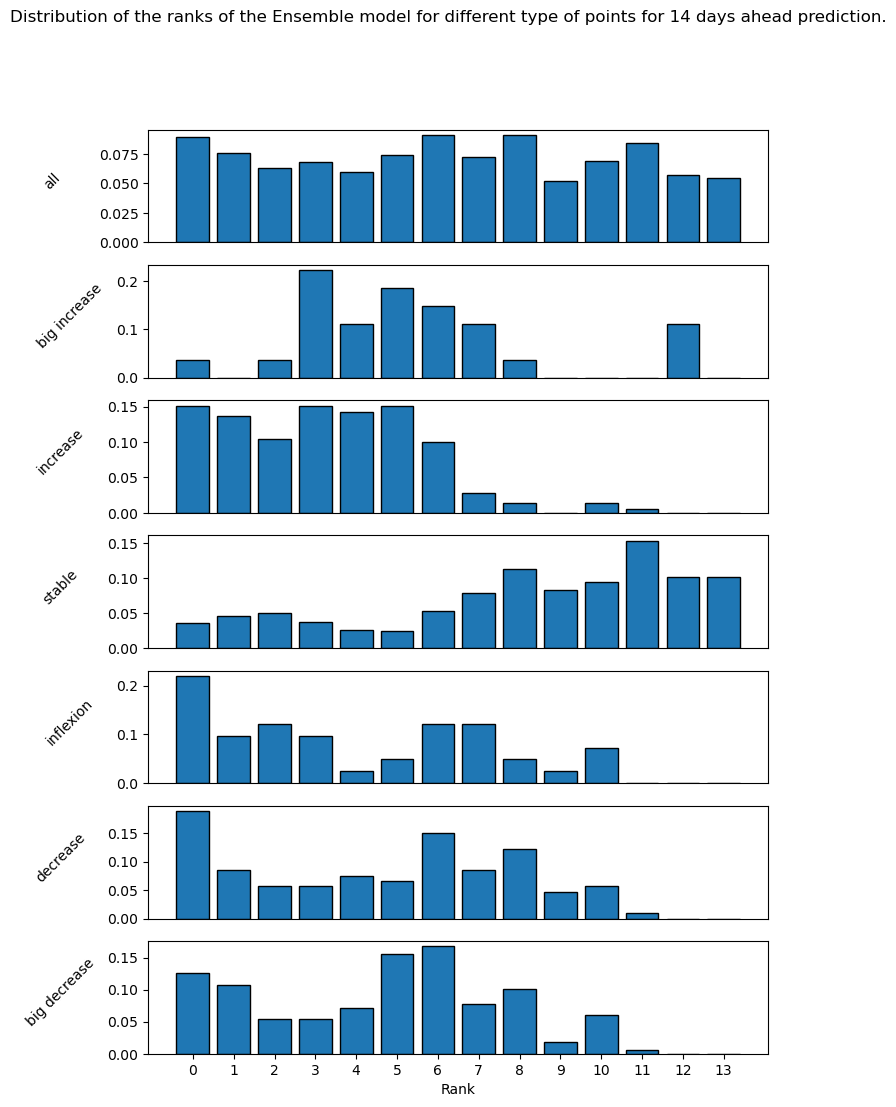

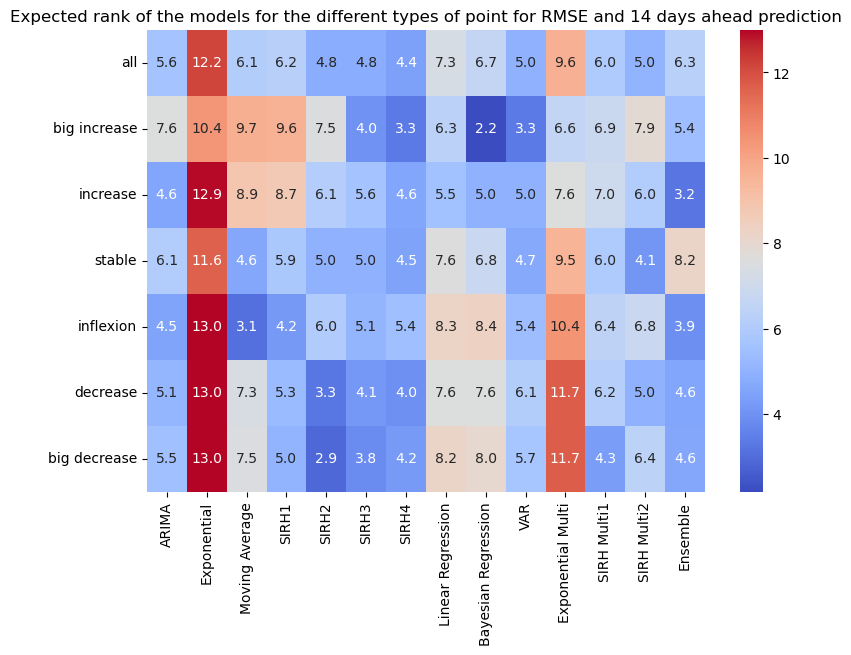

In [174]:
model_type='1D'
loss='RMSE'
reach='7'

for loss in [ 'RMSE']: 
    
    for reach in ['7', '14']:
        ranks_ensb=np.zeros((7,14))
        df_expected_ranks=pd.DataFrame(columns= list_of_models, index = ['all','big increase', 'increase' , 'stable', 'inflexion', 'decrease', 'big decrease'] )
        type_of_points=['all','big increase', 'increase' , 'stable', 'inflexion', 'decrease', 'big decrease']
        for numeropoint, label_point in enumerate( type_of_points):
        # for label_point in ['all']:
            list_of_models= models1Dnames+models3Dnames + ['Ensemble']
            list_of_models.remove('Moving Average Multi')
            all_ranks=np.zeros((len(list_of_models), len(list_of_models)))
            results_list=[ name for name in os.listdir('./results/global_evaluation_from_zero_corrected/') if loss in name and '1D' in name and 'reach_='+str(reach) in name and is_in_test_set(name)  ] # results of the models
            for name in results_list :
                mob=int(name.split('_')[-5])
                pand=int(name.split('_')[-4])
                dicoresults1=df_to_dict(pd.read_csv('./results/global_evaluation_from_zero_corrected/'+name))
                dicoresults2=df_to_dict(pd.read_csv('./results/global_evaluation_from_zero_corrected/'+name.replace('1D', '3D')))
                dicoresults=concat_dico(dicoresults1, dicoresults2)
                df=pd.read_csv('./all_pandemics/pandemic_'+name.split('_')[-5]+'_'+name.split('_')[-4]+'.csv')
                df.index=['n_hospitalized', 'n_infectious', 'mobility', 'r_eff']
                df.drop(['Unnamed: 0'], axis=1, inplace=True)
                n_hospitalized = np.array(df.loc['n_hospitalized'])
                indexs_points=[[20*i] for i in range(1, 15) ] 
                prediction=pd.read_csv('./results/predictions_of_the_models_corrected/predictions_'+str(reach)+'_days_on_pandemic_'+str(mob)+'_'+str(pand)+'.csv')
                prediction.drop(['Unnamed: 0'], axis=1, inplace=True)
                prediction.index=[20*i for i in range(1, 15)]
                prediction_bis=prediction.drop(['Real values', 'Exponential', 'Exponential Multi'], axis=1)
                prediction_all=prediction
                prediction=prediction_bis
                for point in indexs_points: 
                    if label_point=='all': 
                        # ensemble_value=prediction.loc[point[0]].mean()
                        ensemble_value=np.matmul(np.array(prediction.loc[point[0]]), regressor.coef_) + regressor.intercept_
                        real_value=prediction_all['Real values'].loc[point[0]]
                        ensemble_perf=np.sqrt((ensemble_value-real_value)**2)
                        perfs=dicoresults[str(point)]
                        assert(len(perfs)==14)
                        assert(abs(perfs[2] - perfs[11]) < 0.001, (perfs[2], perfs[11])) 
                        perfs.pop(11) # remove the moving average multi
                        assert(len(perfs)==13)
                        perfs.append(ensemble_perf)
                        rankings=get_classement(perfs)
                        for i in range(len(rankings)): 
                            rank_model_i=rankings[i]
                            all_ranks[i][rank_model_i]+=1

                    elif classify(point[0], n_hospitalized) == label_point :
                        # ensemble_value=prediction.loc[point[0]].mean()
                        ensemble_value=np.matmul(np.array(prediction.loc[point[0]]), regressor.coef_) + regressor.intercept_
                        real_value=prediction_all['Real values'].loc[point[0]]
                        ensemble_perf=np.sqrt((ensemble_value-real_value)**2)
                        perfs=dicoresults[str(point)]
                        assert(len(perfs)==14)
                        assert(abs(perfs[2] - perfs[11]) < 0.001, (perfs[2], perfs[11])) 
                        perfs.pop(11) # remove the moving average multi
                        assert(len(perfs)==13)
                        perfs.append(ensemble_perf)
                        
                        rankings=get_classement(perfs)
                        for i in range(len(rankings)): 
                            rank_model_i=rankings[i]
                            all_ranks[i][rank_model_i]+=1
            

            ranks_ensb[numeropoint]=all_ranks[-1]
            fig, axs = plt.subplots(len(list_of_models), figsize=(8, 12))     
            expected_ranks=[np.sum((np.array(all_ranks[i])/np.sum(np.array(all_ranks[i])))*np.array([i for i in range( len(rankings))])) for i in range(len(rankings))]    
            for i in range(len(rankings)):   
                axs[i].bar([j for j in range(len(rankings))], np.array(all_ranks[i])/np.sum(np.array(all_ranks[i])), edgecolor='black', width = 0.5)
                axs[i].set_yticks([ round(np.max(np.array(all_ranks[i])/np.sum(np.array(all_ranks[i]))), 1) ])
                axs[i].set_ylim(bottom = 0 , top = (np.max(np.array(all_ranks[i])/np.sum(np.array(all_ranks[i]))))*1.2)
                axs[i].set_ylabel(list_of_models[i], labelpad=30)
                axs[i].yaxis.label.set_rotation(45)
                if i != len(rankings)-1:
                    axs[i].set_xticks([])
                else : 
                    axs[i].set_xticks([j for j in range(len(rankings))])
                    axs[i].set_xlabel('Rank'  )
                fig.suptitle('Distribution of the ranks of each model for '+label_point+' points for '+loss+' and '+reach+' days ahead prediction.')

            plt.show()
            plt.figure(figsize=(10, 6))
            exp_copy=expected_ranks.copy()
            expected_ranks.sort()
            df_expected_ranks.loc[label_point]=exp_copy
            plt.bar(sort_list(list_of_models, exp_copy), expected_ranks, edgecolor='black')
            plt.xticks(rotation=90)
            plt.title('Expected rank of each model for '+label_point+' points for '+loss+' and '+reach+' days ahead prediction.')
            plt.show()
        fig, ax = plt.subplots(7 , figsize=(8, 12))
        for i in range(7): 
            ax[i].bar([j for j in range(14)], np.array(ranks_ensb[i])/(np.sum(np.array(ranks_ensb[i]))), edgecolor='black')
            # ax[i].set_yticks([ round(np.max(ranks_ensb[i])/np.sum(ranks_ensb[i]), 1) ])
            # ax[i].set_ylim(bottom = 0 , top = (np.max(ranks_ensb[i])/np.sum(ranks_ensb[i]))*1.2)
            ax[i].set_ylabel(type_of_points[i], labelpad=30)
            ax[i].yaxis.label.set_rotation(45)
            if i != 6:
                ax[i].set_xticks([])
            else : 
                ax[i].set_xticks([j for j in range(14)])
                ax[i].set_xlabel('Rank'  )
            fig.suptitle('Distribution of the ranks of the Ensemble model for different type of points for '+reach+' days ahead prediction.')
            
        plt.figure(figsize=(9,6))
        sns.heatmap(df_expected_ranks.astype(float), cmap='coolwarm', annot=True, fmt=".1f")
        xticks = list_of_models
        yticks = ['all', 'big increase', 'increase', 'stable', 'inflexion', 'decrease', 'big decrease']
        plt.xticks(ticks=[i+0.5 for i in range(len(xticks))], labels=xticks, rotation=90)
        plt.yticks(ticks=[i+0.5 for i in range(len(yticks))], labels=yticks)
        plt.title('Expected rank of the models for the different types of point for '+str(loss)+' and '+str(reach)+' days ahead prediction')
        plt.show()
    

In [194]:
prediction=pd.read_csv('./results/predictions_of_the_models_corrected/predictions_7_days_on_pandemic_0_0.csv')
prediction.drop(['Unnamed: 0'], axis=1, inplace=True)
prediction.index=[20 * i for i in range(1, 15)]
prediction

prediction2=pd.read_csv('./results/predictions_of_the_models_corrected/predictions_7_days_on_pandemic_0_1.csv')
prediction2.drop(['Unnamed: 0'], axis=1, inplace=True)
prediction2.index=[20 * i for i in range(1, 15)]
prediction2



,ARIMA,Exponential,Moving Average,SIRH1,SIRH2,SIRH3,SIRH4,Linear Regression,Bayesian Regression,VAR,Exponential Multi,Moving Average Multi,SIRH Multi1,SIRH Multi2,Real values
20,0.132984,9.504470e+00,0.714286,5.717965,5.249334,3.901398,4.289988,0.714286,0.963053,2.113133,7.142857e-01,0.714286,2.421123,2.323102,2.0
40,12.154926,1.347070e+01,7.428571,19.211028,17.819644,8.894745,8.140003,21.763344,21.722641,10.461497,7.797953e+00,7.428571,9.840593,9.918155,15.0
60,31.986087,-1.538406e+15,29.000000,21.837602,19.104797,47.370101,48.796223,-6.278041,53.756682,43.525139,5.139429e+01,29.000000,29.558464,35.952950,34.0
80,45.883227,3.400776e+24,42.142857,20.830609,13.740314,36.996254,46.147202,20.373181,23.054288,53.537107,5.239661e+01,42.142857,56.818802,51.753562,48.0
100,54.563137,2.414255e+32,51.285714,24.457282,16.538183,44.494272,53.406588,54.201258,55.667872,58.145417,6.270972e+01,51.285714,86.617983,51.285714,86.0
120,151.322320,7.576325e+35,122.857143,102.594051,97.468265,153.183696,122.857143,177.660842,169.020125,170.912509,5.410387e+01,122.857143,173.775564,160.853449,171.0
140,261.179467,-4.537768e+50,221.428571,180.197177,176.846722,288.001192,284.564488,293.112429,289.660054,287.943400,3.533545e+02,221.428571,261.872737,221.428571,263.0
160,356.962583,-1.947235e+59,340.571429,259.540138,395.274088,396.333877,399.395457,409.528493,410.659342,401.200877,4.727677e+02,340.571429,369.278063,366.078752,408.0
180,527.018921,-2.831161e+67,484.428571,379.970423,522.335549,543.316051,552.950627,599.585182,596.699577,618.086426,-3.363073e+17,484.428571,665.073468,638.979541,580.0
200,1211.072153,1.925866e+77,834.285714,733.375284,964.402608,957.037813,1074.938120,1282.389277,1274.707608,1292.524867,1.194072e+03,834.285714,1265.924993,1210.112667,1350.0


Next cells to correct infs in the dataframes

In [155]:
if False : 
    names = os.listdir('./results/global_evaluation_from_zero/') 
    for name in names: 
        df=pd.DataFrame(json.load(open('./results/global_evaluation_from_zero/'+name)))
        if len(df.index) == 9 : 
            df.index=models1Dnames
        elif len(df.index) == 5 :
            df.index=models3Dnames
        else : 
            raise ValueError('error')

        for col in df.columns: 
            for row in df.index: 
                if df[col][row]==np.inf: 
                    if len(df.index) == 9 : 
                        df[col][row]=df[col]['Moving Average'] + 0.00001
                    elif len(df.index) == 5 :
                        df[col][row]=df[col]['Moving Average Multi'] + 0.00001
                    else : 
                        raise ValueError('error')
        if '1D' in name : 
            df.index=[i for i in range(9)]
        elif '3D' in name : 
            df.index=[i for i in range(5)]
        else : 
            raise ValueError('error')
        df.to_csv('./results/global_evaluation_from_zero_corrected/'+name.split('.')[0]+'.csv')


In [ ]:
if False: 
    names = os.listdir('./results/predictions_of_the_models/')
    for name in names : 
        df=pd.read_csv('./results/predictions_of_the_models/'+name)
        df=df.set_index('Unnamed: 0')

        for col in df.columns:
            for row in df.index: 
                if df[col][row]==np.inf: 
                    df[col][row]=df['Moving Average'][row]

        df.to_csv('./results/predictions_of_the_models_corrected/'+name)
